# W261 Final Project - Airline Delays Prediction

Justin Trobec, Jeff Li, Sonya Chen, Karthik Srinivasan

Spring 2021, section 5, Team 25

## Table of Contents

* __Section 1__ - Question Formulation
* __Section 2__ - EDA & Discussion of Challenges
* __Section 3__ - Feature Engineering
* __Section 4__ - Algorithm Explanation
* __Section 5__ - Algorithm Implementation
* __Section 6__ - Conclusions
* __Section 7__ - Application of Course Concepts
* __Section 8__ - Companion Notebooks
* __Section 9__ - Appendix

## Companion Notebooks

Our team constructed different Databricks notebooks which provide the underlying code for how each of the following features plots were constructed. Contents such as plots will be referenced in this notebook, but the underlying code can be found in the companion notebooks:

- Data Processing (Time Features)
    - [Databricks](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/4480952025475049/command/528073926731710)
    - [Github](https://github.com/kasri-mids/ucb-w261-sp2021-team25/blob/main/notebooks/Users/sonya/team25_final_project_airlines_main_sonya.ipynb)
    
- EDA
    - [Databricks](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/37954262501070/command/1553213441173274)
    - [Github](https://github.com/kasri-mids/ucb-w261-sp2021-team25/blob/main/notebooks/Users/kasri@berkeley.edu/final_project_team25_eda.py)

- Weather
    - [Databricks](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/4377823981601721/)
    - [Github](https://github.com/kasri-mids/ucb-w261-sp2021-team25/blob/main/notebooks/Users/jeffli930%40berkeley.edu/final_project_team25_weather.py)

- PageRank
    - [Databricks](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/4377823981609021/command/4464614029139162)
    - [Github](https://github.com/kasri-mids/ucb-w261-sp2021-team25/blob/main/Assignments/final_project_team25_centrality.py)

- Inbound/Outbound
    - [Databricks](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/439895120630397/command/439895120630400)
    - [Github](https://github.com/kasri-mids/ucb-w261-sp2021-team25/blob/main/notebooks/Users/sonya/airports_inbound_outbound_diverted_sonya_v7.py)

- Join/Imputation Notebook
    - [Databricks](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/439895120619713/command/439895120619714)
    - [Github](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/439895120619713)
    
    
- Modeling
    - [Databricks](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/439895120621294)
    - [Github](https://github.com/kasri-mids/ucb-w261-sp2021-team25/blob/main/notebooks/Users/kasri%40berkeley.edu/final_project_team25_model.py)

## Slides
* [Slides](https://docs.google.com/presentation/d/12L61_t3-HJnCUst95Y8bLuk15Xo07VXh3N7LWhKK9Lo/edit?usp=sharing)

## Imports

In [0]:
!pip install -U dtreeviz

Collecting dtreeviz
 Downloading dtreeviz-1.3.tar.gz (60 kB)
█████▍ | 10 kB 29.6 MB/s eta 0:00:01 |██████████▊ | 20 kB 34.5 MB/s eta 0:00:01 |████████████████▏ | 30 kB 38.4 MB/s eta 0:00:01 |█████████████████████▌ | 40 kB 42.8 MB/s eta 0:00:01 |██████████████████████████▉ | 51 kB 39.2 MB/s eta 0:00:01 |████████████████████████████████| 60 kB 11.4 MB/s 
Collecting graphviz>=0.9
 Downloading graphviz-0.16-py2.py3-none-any.whl (19 kB)
Requirement already satisfied, skipping upgrade: pandas in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from dtreeviz) (1.0.1)
Requirement already satisfied, skipping upgrade: numpy in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from dtreeviz) (1.18.1)
Requirement already satisfied, skipping upgrade: scikit-learn in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from dtreeviz) (0.22.1)
Requirement already satisfied, skipping upgrade: matplotlib in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from dtreeviz) (3.1.3)
Collecting colour
 Downloading colour-0.1.5-py2.py3-none-any.whl (23 kB)
Collecting pytest
 Downloading pytest-6.2.3-py3-none-any.whl (280 kB)
█▏ | 10 kB 32.2 MB/s eta 0:00:01 |██▍ | 20 kB 38.7 MB/s eta 0:00:01 |███▌ | 30 kB 44.1 MB/s eta 0:00:01 |████▊ | 40 kB 47.5 MB/s eta 0:00:01 |█████▉ | 51 kB 49.0 MB/s eta 0:00:01 |███████ | 61 kB 51.4 MB/s eta 0:00:01 |████████▏ | 71 kB 53.4 MB/s eta 0:00:01 |█████████▍ | 81 kB 53.9 MB/s eta 0:00:01 |██████████▌ | 92 kB 52.8 MB/s eta 0:00:01 |███████████▊ | 102 kB 53.1 MB/s eta 0:00:01 |████████████▉ | 112 kB 53.1 MB/s eta 0:00:01 |██████████████ | 122 kB 53.1 MB/s eta 0:00:01 |███████████████▏ | 133 kB 53.1 MB/s eta 0:00:01 |████████████████▍ | 143 kB 53.1 MB/s eta 0:00:01 |█████████████████▌ | 153 kB 53.1 MB/s eta 0:00:01 |██████████████████▊ | 163 kB 53.1 MB/s eta 0:00:01 |███████████████████▉ | 174 kB 53.1 MB/s eta 0:00:01 |█████████████████████ | 184 kB 53.1 MB/s eta 0:00:01 |██████████████████████▏ | 194 kB 53.1 MB/s eta 0:00:01 |███████████████████████▍ | 204 kB 53.1 MB/s eta 0:00:01 |████████████████████████▌ | 215 kB 53.1 MB/s eta 0:00:01 |█████████████████████████▊ | 225 kB 53.1 MB/s eta 0:00:01 |██████████████████████████▉ | 235 kB 53.1 MB/s eta 0:00:01 |████████████████████████████ | 245 kB 53.1 MB/s eta 0:00:01 |█████████████████████████████▏ | 256 kB 53.1 MB/s eta 0:00:01 |██████████████████████████████▍ | 266 kB 53.1 MB/s eta 0:00:01 |███████████████████████████████▌| 276 kB 53.1 MB/s eta 0:00:01 |████████████████████████████████| 280 kB 53.1 MB/s 
Requirement already satisfied, skipping upgrade: python-dateutil>=2.6.1 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from pandas->dtreeviz) (2.8.1)
Requirement already satisfied, skipping upgrade: pytz>=2017.2 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from pandas->dtreeviz) (2019.3)
Requirement already satisfied, skipping upgrade: joblib>=0.11 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from scikit-learn->dtreeviz) (0.14.1)
Requirement already satisfied, skipping upgrade: scipy>=0.17.0 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from scikit-learn->dtreeviz) (1.4.1)
Requirement already satisfied, skipping upgrade: kiwisolver>=1.0.1 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from matplotlib->dtreeviz) (1.1.0)
Requirement already satisfied, skipping upgrade: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from matplotlib->dtreeviz) (2.4.6)
Requirement already satisfied, skipping upgrade: cycler>=0.10 in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (from matplotlib->dtreeviz) (0.10.0)
Collecting pluggy<1.0.0a1,>=0.12
 Downloading pluggy-0.13.1-py2.py3-none-any.whl (18 kB)
Collecting toml
 Downloading toml-0.10.2-py2.py3-none-any.whl (16 kB)
Collecting 

In [0]:
## imports

from pyspark.sql import functions as f
from pyspark.sql.functions import col, sum, avg, max, count, countDistinct, weekofyear, to_timestamp, date_format, to_date, lit, lag, unix_timestamp, expr, ceil, floor, when, hour, dayofweek, month, trim, explode, array, expr, coalesce, isnan

from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, NullType, ShortType, DateType, BooleanType, BinaryType, TimestampType
from pyspark.sql import SQLContext
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pyspark
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, DecisionTreeClassifier, DecisionTreeClassificationModel
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, VectorIndexer, StringIndexer, MinMaxScaler, RobustScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.mllib.classification import LogisticRegressionWithSGD, LogisticRegressionWithLBFGS
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.evaluation import BinaryClassificationMetrics

from distutils.version import LooseVersion
from pyspark.ml import Pipeline
from pyspark.sql.window import Window

from pandas.tseries.holiday import USFederalHolidayCalendar
import datetime
from functools import reduce
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from dtreeviz.models.spark_decision_tree import ShadowSparkTree
from dtreeviz import trees

print(sns.__version__)
sqlContext = SQLContext(sc)

from IPython.display import Image 
from IPython.core.display import HTML 

0.11.1

# S1 - Question Formulation

You should refine the question formulation based on the general task description you’ve been given, ie, predicting flight delays. This should include some discussion of why this is an important task from a business perspective, who the stakeholders are, etc.. Some literature review will be helpful to figure out how this problem is being solved now, and the State Of The Art (SOTA) in this domain. Introduce the goal of your analysis. What questions will you seek to answer, why do people perform this kind of analysis on this kind of data? Preview what level of performance your model would need to achieve to be practically useful. Discuss evaluation metrics.

##  Overview

This notebook is a summary notebook of our team's effort to predict flight delays. Predicting flight delays is no small feat. From a high level, [airline delays cost ~ $33B](https://www.faa.gov/data_research/aviation_data_statistics/media/cost_delay_estimates.pdf). Not only that, approximately 19% of flights were delayed in 2019 [and approximately 1.5% of the flights were cancelled](https://www.mit.edu/~hamsa/pubs/GopalakrishnanBalakrishnanATM2017.pdf). 

While this problem is one that can definitely be continuously dug into and improved upon, we hope that some of the ideas and approaches outlined in this notebook can be applied to improving prediction down the line. 

We have featured some papers here that have helped us inform our approach to this problem.

## Relevant Literature

1) 2017. A Review on Flight Delay Prediction. Alice Sternberg, Jorge de Abreu Soares, Diego Carvalho, Eduardo S. Ogasawara

2) 2019. A Data Mining Approach to Flight Arrival Delay Prediction for American Airlines. Navoneel Chakrabarty

3) 2019. Development of a predictive model for on-time arrival flight of airliner by discovering correlation between flight and weather data. Noriko Etani.

4) https://stat-or.unc.edu/wp-content/uploads/sites/182/2018/09/Paper3_MSOM_2012_AirlineFlightDelays.pdf



### Evaluation metrics

A brief comment: a common approach to evaluating most ML based problems is to look at problems from a precision recall approach. Emphasizing precision will position our target towards emphasizing false positive whereas recall will position our target against false negatives. Accidentally predicting a flight may be delayed (false positive) cause someone to show up later than expected to a flight. Conversely, failing to predict a delayed flight may cause someone to show up earlier than needed to an airport.

There are many people in the economic system who are affected by the accuracy of flight predictions - flight passengers, airport and airline employees, as well as general shareholders of airline companies. Ultimately, it is incumbent on the customer (namely, airline companies) to accurately measure the dollar cost of delayed flights from a FP, FN perspective, and which one to subsequently optimize for. 

The formula for an \\(F\\) beta score is below:

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{(\beta^{2} \cdot precision) + recall} $$


For reference, utilizing a \\( F_{0.5} \\) score would produce an F score more geared towards precision while still factoring in recall. On the other hand, utilizing a \\( F_2 \\) score would bias our results more towards recall as opposed to precision. 

We take the airline/airport's point of view and use the \\( F_{0.5} \\) score to determine model performance. We believe that falsely predicting a delay (precision) that results in airlines/airports making changes is far more detrimental than the passenger having to unexpectedly wait longer for departures (recall).

# S2 - EDA & Discussion of Challenges

Determine a handful of relevant EDA tasks that will help you make decisions about how you implement the algorithm to be scalable. Discuss any challenges that you anticipate based on the EDA you perform.

As part of the project, we were given access to a dataset consisting of US flights from the years 2015-2019. We generally worked with data in SQL format, using the Databricks tables as that made it relatively easy to checkpoint our datasets and seemed less cumbersome than working with pyspark. We loaded the flight data into a table and looked at some basic stats.

In [0]:
%sql

SELECT 'All' as Year, count(*) as RecordCount
FROM group25.airlines_main
UNION
SELECT YEAR, count(*) as RecordCount
FROM group25.airlines_main
GROUP BY 1
ORDER BY 1;

Year,RecordCount
2015,5819079
2016,5617658
2017,5674621
2018,7213446
2019,7422037
All,31746841


The airlines data is comprised of approximately 31M flights, and the number of flights seems to be increasing year-over-year. We suspect if we had more recent data, we would have seen a dip starting in 2020 as lockdowns for the Covid pandemic began in the US. We realized up front that we would run into challenges with leakage, which we will discuss more in depth later. For now, we will exclude 2019 from EDA, as that will be our holdout set for test.

## Schema & Meaning

In [0]:
%sql

DESCRIBE group25.airlines_main

col_name,data_type,comment
YEAR,int,null
QUARTER,int,null
MONTH,int,null
DAY_OF_MONTH,int,null
DAY_OF_WEEK,int,null
FL_DATE,string,null
OP_UNIQUE_CARRIER,string,null
OP_CARRIER_AIRLINE_ID,int,null
OP_CARRIER,string,null
TAIL_NUM,string,null


Looking at the schema for the table gave us some initial sense of which data might be continuous (e.g. often, but not always, `int` fields) versus categorical (`string` fields).
We used [the provided codebook](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ) to better understand the fields in the table. One of the first challenges we faced was getting data into UTC format, since the codebook indicated that times in the original dataset were local times relative to the airport. In order to convert these into UTC, we first had to find additional data telling us what timezone the airport was in. For this, we found [Airport codes and timezones](https://openflights.org/data.html) from the OpenFlights project.

This data was joined to the flights data and combined with the data in the flights field to generate a new table with UTC timings. This was particularly necessary for joining with the weather datasets, which will be discussed in a section of its own later in this notebook.

## Exploration Process

Our primary goal for EDA was to understand which features might be useful as predictors for flight delays. We wrote some simple code to visualize either categorical or continuous variables against the DEP_DEL15 column, which indicates whether a flight was delayed more than 15 minutes. We created a couple of simple methods to plot categorical and continuous variables in a uniform way. We'll visualize a few interesting examples below, with a more complete set to be found in the EDA notebook.

In [0]:
def get_sampled_dataset(col_name, sample_size):
    return sqlContext.sql("""SELECT * FROM (SELECT COALESCE(DEP_DELAY, 0) AS DEP_DELAY, COALESCE(DEP_DEL15, 0) AS DEP_DEL15, {}
                             FROM group25.airlines_utc_main WHERE year<2019) TABLESAMPLE({} ROWS)""".format(col_name, sample_size)).toPandas()
  
def set_xticklabels(ax):
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

def set_yunits(ax, col_name, units):
  if units is not None:
    ax.set(ylabel=f'{col_name} ({units})')

def plot_cont_vs_delay(col_name, sample_size=100_000, df=None, units=None):
  sns.set(style="darkgrid")
  sns.set_palette("colorblind")

  sampledDf = df if (df is not None) else get_sampled_dataset(col_name, sample_size)
  sampledDf['DEP_DEL15_TEXT'] = sampledDf['DEP_DEL15'].apply(lambda x: 'YES DELAYED' if x == 1 else "NOT DELAYED")
  fig, axes = plt.subplots(1, 3, figsize=(20,5))
  sns.scatterplot(x='DEP_DELAY', y=col_name, data=sampledDf, ax=axes[0])
  axes[0].set(title=f'DEP_DELAY vs {col_name}')
  set_yunits(axes[0], col_name, units)
  
  sns.boxplot(y=col_name, x='DEP_DEL15_TEXT', data=sampledDf, ax=axes[1], width=0.4)
  axes[1].set(title=f'DEP_DEL15 vs {col_name}', xlabel='DEP_DEL15')
  set_yunits(axes[1], col_name, units)
  
  sns.boxplot(y=col_name, x='DEP_DEL15_TEXT', data=sampledDf, ax=axes[2], showfliers=False, width=0.4)
  axes[2].set(title=f'DEP_DEL15 vs {col_name} - No outliers', xlabel='DEP_DEL15')
  set_yunits(axes[2], col_name, units)
  plt.suptitle(f'{col_name} vs Delay')


def plot_cat_vs_delay(col_name, sample_size=100_000, rename_cats=None, cat_order=None, df = None, units=None):
  sns.set(style="darkgrid")
  sns.set_palette("colorblind")

  sampledDf = df if (df is not None) else get_sampled_dataset(col_name, sample_size)
  sampledDf['DEP_DEL15_TEXT'] = sampledDf['DEP_DEL15'].apply(lambda x: 'YES DELAYED' if x == 1 else "NOT DELAYED")
  fig, axes = plt.subplots(1, 4, figsize=(25,5))
  
  if rename_cats:
    sampledDf[col_name] = sampledDf[col_name].apply(rename_cats)
  
  sns.stripplot(y='DEP_DELAY', x=col_name, order=cat_order, data=sampledDf, ax=axes[0])
  axes[0].set(title=f'DEP_DELAY vs {col_name} - Distributions', ylabel="DEP_DELAY (minutes)")
  
  sns.boxplot(y='DEP_DELAY', x=col_name, order=cat_order, showfliers=False, data=sampledDf, ax=axes[1])
  axes[1].set(title=f'DEP_DELAY vs {col_name} - Distributions w/o Outliers', ylabel="DEP_DELAY (minutes)")
  
  sns.countplot(x=col_name, hue='DEP_DEL15_TEXT', order=cat_order, data=sampledDf, ax=axes[2])
  axes[2].set(title=f'DEP_DEL15 vs {col_name} - Class Counts')
  
  normalized = sampledDf.groupby(col_name)['DEP_DEL15_TEXT'].value_counts(normalize=True).unstack('DEP_DEL15_TEXT').plot.bar(stacked=True, ax=axes[3])
  axes[3].set(title=f'DEP_DEL15 by {col_name} - Normalized Counts')
  
  for ax in axes:
    set_xticklabels(ax)
    
  plt.suptitle(f'{col_name} vs Delay')

We looked at correlations in the data to understand relationships between certain features. For example, this plot shows correlations between many of the continuous features in the flights data:

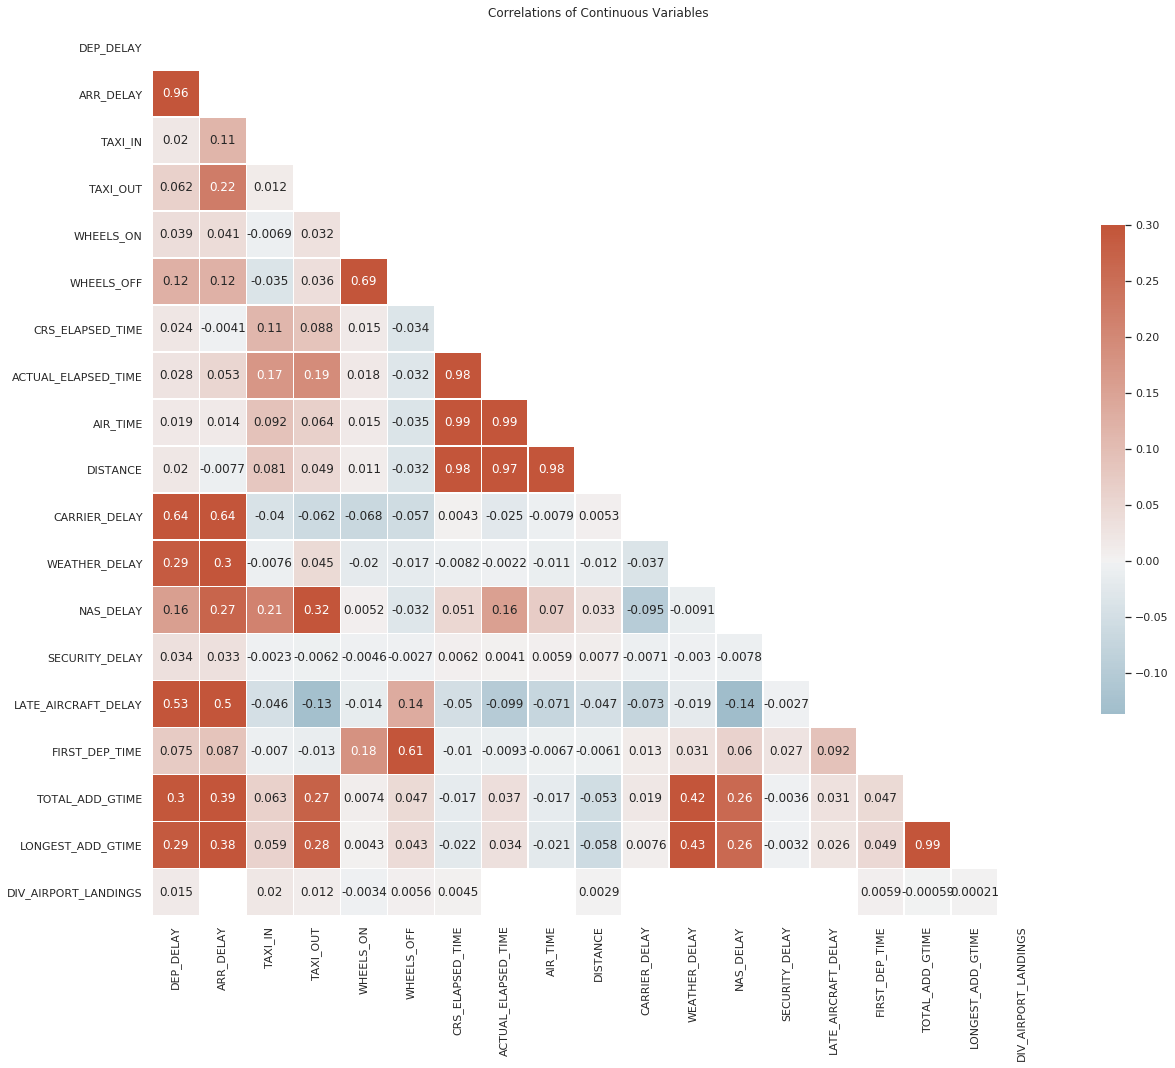

In [0]:
sns.set(style='white')
cont_features = [
  'DEP_DELAY', 
  'ARR_DELAY', 
  'TAXI_IN', 
  'TAXI_OUT', 
  'WHEELS_ON', 
  'WHEELS_OFF', 
  'CRS_ELAPSED_TIME'
  ,'ACTUAL_ELAPSED_TIME'
  ,'AIR_TIME'
  ,'DISTANCE'
  ,'CARRIER_DELAY'
  ,'WEATHER_DELAY'
  ,'NAS_DELAY'
  ,'SECURITY_DELAY'
  ,'LATE_AIRCRAFT_DELAY'
  ,'FIRST_DEP_TIME'
  ,'TOTAL_ADD_GTIME'
  ,'LONGEST_ADD_GTIME'
  ,'DIV_AIRPORT_LANDINGS']

# Generate a large random dataset
feat_data = sqlContext.sql("""SELECT {} FROM (SELECT * FROM group25.airlines_utc_main WHERE year<2019) TABLESAMPLE({} ROWS)""".format(','.join(cont_features), 1_000_000)).toPandas()

# Compute the correlation matrix
corr = feat_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

x = ax.set(title = 'Correlations of Continuous Variables')

Looking at this chart helps us identify features that are highly-colinear and probably would not make sense to include together in our models. For example, `ACTUAL_ELAPSED_TIME` and `AIR_TIME` have a correlation coefficient of 0.99 and therefore probably do not both need to be included in set of model features we use.

Further, we see some interesting relationships to the outcome variable, for example that distance and delay times are not highly correlated, which might suggest that the length of a flight is not particularly helpful in understanding the chances it might be delayed. We can look more closely at that relationship using our plotting methods.

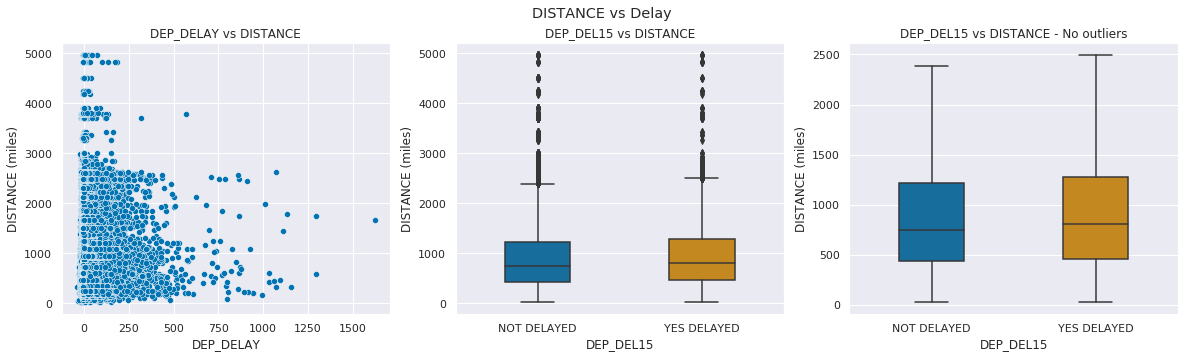

In [0]:
plot_cont_vs_delay('DISTANCE', units="miles")

On the other hand, many of the features in the dataset are not actually useful for prediction because they would not be available at the time of prediction. Obviously, we cannot include arrival time in predicting departure delays. So many of these features were ruled out on that basis.

## Time Based Features

We looked at the daily aggregate fraction of 15-minute delayed flights and noticed some very clear patterns. The winter holiday season has a clear spike, and there also is an increase in the summer months, corresponding to the US vacation season. One possibility this suggested to us was running a time series model (e.g. Seasonal ARIMA) and using the output as a feature. This fell to low in our priority list to address, so we leave that for further work.

Out[3]:

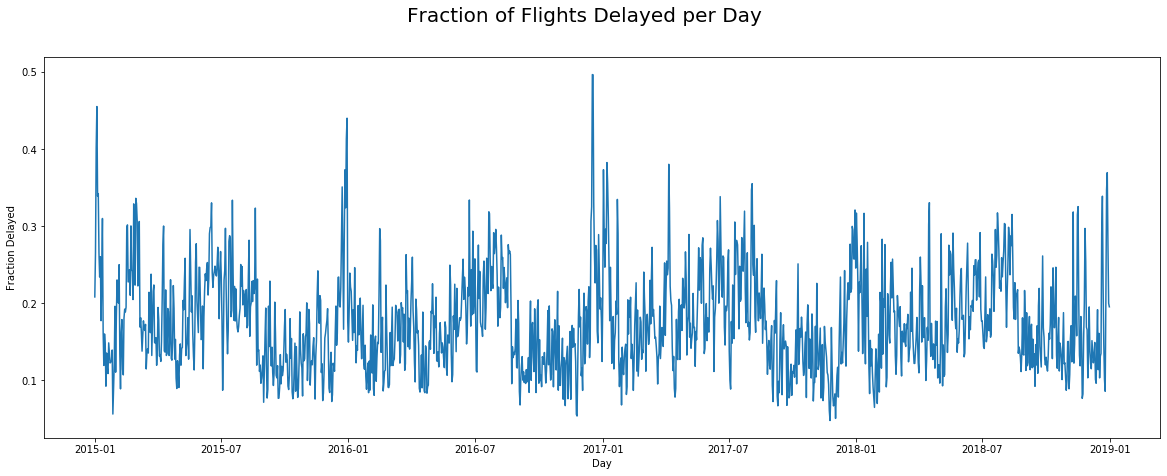

Text(0.5, 0.98, 'Fraction of Flights Delayed per Day')

In [0]:
daily_delay_frac= spark.sql("SELECT * FROM group25.daily_delay_fraction WHERE year(day) < 2019 ORDER BY day").toPandas()
fig, ax = plt.subplots(1, 1, figsize=(20,7))
sns.lineplot(y='fraction_delayed', x = 'day', data=daily_delay_frac)
ax.set(xlabel="Day", ylabel="Fraction Delayed")
plt.suptitle('Fraction of Flights Delayed per Day', fontsize = 20)

There is an interesting pattern in the impact of local hours on delays. For the continuous version of delays, we end up with a clear gap in the distribution that shows up in the strip plot (on the left) below, and is consistent across hours. Additionally we see that a larger percentage of flights are delayed past 15 minutes in the local evening hours, between 7 and 10PM.

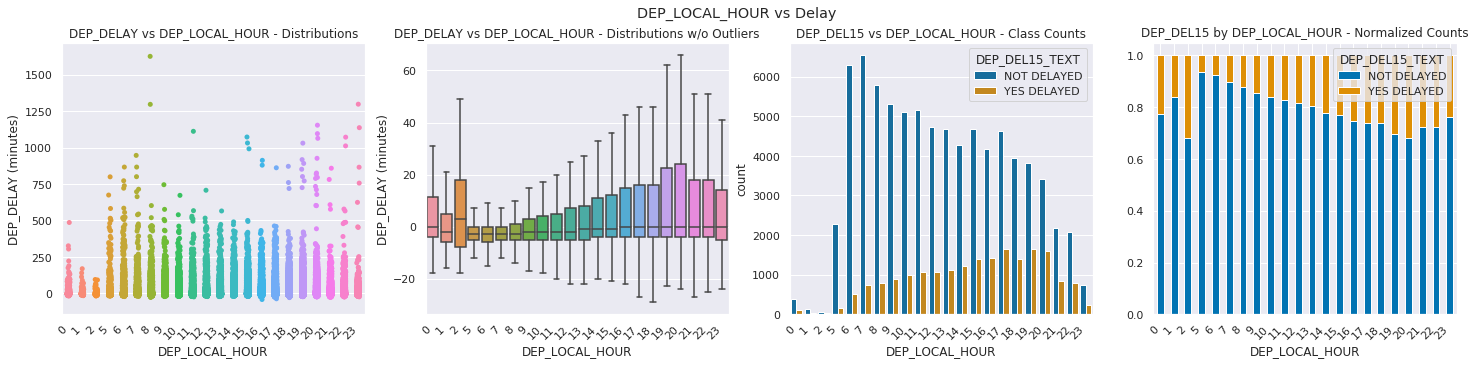

In [0]:
plot_cat_vs_delay('DEP_LOCAL_HOUR', sample_size = 100_000)

Somewhat surprisingly, we did not observe as much signal coming from the day of week. It seems that time of day is more predictive of delays than day of week:

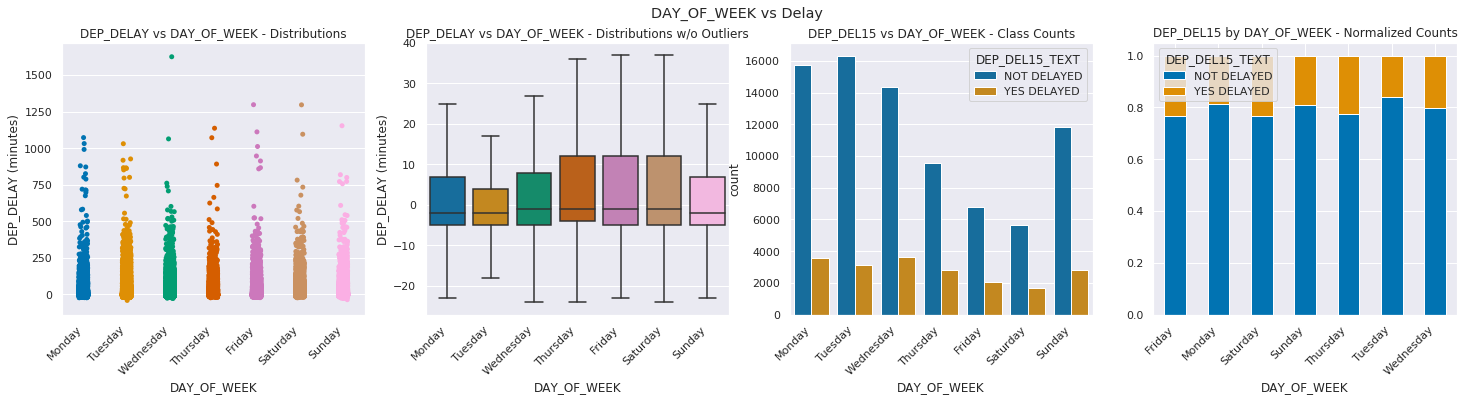

In [0]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot_cat_vs_delay('DAY_OF_WEEK', sample_size = 100_000, rename_cats = lambda x: days[x-1], cat_order=days)

In addition to the flights data, we also had access to a dataset with weather reports. Working with this dataset was a complicated process involving its own EDA, and we will discuss that process more in the Feature Engineering - Weather section of this report.

# S3 - Feature Engineering

Apply relevant feature transformations, dimensionality reduction if needed, interaction terms, treatment of categorical variables, etc.. Justify your choices.

## Pipeline Breakdown
A high level overfiew of our overall feature engineering process can be found below. We will cover some of the interesting feature engineering topics from this pipeline.

In [0]:
displayHTML("<img src='https://github.com/kasri-mids/ucb-w261-sp2021-team25/blob/main/images/ML%20pipeline.png?raw=true'>")

## Time

### Motivation

A common trope for time is that it is a precious resource, and that is doubly true for the field of flight delay prediction. The concept of time was a topic we discussed heavily when tackling this problem - more specifically, the granularity. For instance, will knowing the information for the previous year help us make an informed decision for whether the next flight will be delayed? Possibly, we also wanted to have more granular data as well, since we believed that there would be much better granularity. On the other hand, will knowing the flight data in 5 minute increments and binning the data as such lead to better predictions? That is certainly possible but may also lead to some additional processing for complicated pipelined features.

Ultimately, we settled on an hourly granularity. While this was partially based on consensus and intuition, it is a nice round unit of time that is widely understood and helps to make this analysis easier to interpret. However, more granular binnings of time, such as by 5 minute increments, could possibly yield better results.

In terms of how far in advance we would have this information, we decided to try and gather a set of features for each airport 2 hours in advance. For instance, what was the weather 2 hours prior to the scheduled takeoff? What was the status of delays and diverted flights at the outgoing airport?

The challenge with this approach was that not all our data was formatted correctly. While the weather data was given in a standardized UTC format, the flight data was not. Ensuring that our dataset utilized consistent time formats across the board was important to predicting delays 2 hours out. The datetime format is critical for several niche problems with joining on data from 2 hours prior. For instance, what if you want flight data 2 hours prior to a 1 am flight? You cannot join simply on FL_Date and a hour granularity. Furthermore, once you start working with time zones and daylight savings, things get especially complicated. A good rule of thumb for sanity is to generate all of your datetime formats first as upstream as possible, before applying any interval functions. Any downstream code or engineered features benefit immensely from this approach.

In terms of grabbing the time zone data per airport, we utilized the OpenFlights data. In order to ensure proper matching with our dataset, we utilized timezone data from [OpenFlights](https://openflights.org/data.html).

Spark has some limited inbuilt capabilities when it comes to handling time zones, so we leveraged more commonly used datetime python libraries. The issue with this is that you have to run your data through a Spark UDF to leverage the datetime library at scale. While doing this is not the most performant Spark operation, it did work with the scale of data we had in a reasonable amount of time.

In [0]:
displayHTML("<img src = 'https://github.com/kasri-mids/ucb-w261-sp2021-team25/blob/main/images/w261_flowchart2.png?raw=true'>")

## Weather

### Data Overview
Our team utilized data from NOAA's National Centers for Environmental Information. We found this data to be extremely rich, with 630,904,436 records. Not only was this dataset extremely dense, it consisted of is comprised of multiple different report types. A table of the different report types and their descriptions is provided below.

| Report Type | Description | Number of Records
|-----------------|---------------|---------------|
|CRN05|Climate Reference Network report, with 5-minute reporting interval|80,363,686
|FM-12|SYNOP Report of surface observation form a fixed land station|171,069,693
|FM-13|SHIP Report of surface observation from a sea station|5,041,888
|FM-14|SYNOP MOBIL Report of surface observation from a mobile land station|10,988,064
|FM-15|METAR Aviation routine weather report|313,794,637
|FM-16|SPECI Aviation selected special weather report|23,381,469
|FM-18|BUOY Report of a buoy observation|109,418
|SAO|Airways report (includes record specials)|22,149,449
|SAOSP|Airways special report (excluding record specials)|3,683
|SHEF|Standard Hydrologic Exchange Format|422,398
|SOD|Summary of Day|3,268,119
|SOM|Summary of Month|64,346
|SURF|Surface Radiation Network report|235,641
|SY-MT|Synoptic and METAR merged report|11,945

Furthermore, there was 177 different columns present within the dataset. For the purpose of brevity, we will not highlight every column in the dataset, however, a more detailed description for each column can be found in the following document. https://www.ncei.noaa.gov/data/global-hourly/doc/isd-format-document.pdf

We will cover one of the main fields that we utilized in our modeling process below.

### Example of how a field was parsed

We will walk through the field AA1 as an example for how features were mined in the NOAA dataset. All of the other columns we mined for used a similar format, so highlighting one instance should also inform how the other fields were parsed. The field AA1 is a comma delimited field. This applies to most, if not all columns in the ISD dataset. An observation for AA1 may look like the following.

__Sample Field:__ 04,9996,4,2

Based on the ISD format document provided by NOAA, the definition for the field can be interpreted as the following

* First delimited field: LIQUID-PRECIPITATION period quantity
* Second delimited field: LIQUID-PRECIPITATION depth dimension
* Third delimited field: LIQUID-PRECIPITATION condition code
* Fourth delimited field: LIQUID-PRECIPITATION quality code

Using the definitions present in the NOAA dataset, we filtered down the dataset on the 3rd and 4th delimited fields (condition code, quality code), which give information about the quality about the particular record. For instance, a quality field with the value "2" is denoted as being suspect according to the ISD document. 

Once the appropriate records were filtered out, we then aggregated the data on a callsign (airport), date, and hourly basis for the respective field (AA1), and then took the average at each aggregation point. 


#### Why AA1?

When examining the NOAA dataset for instances of precipitation, we noticed that there were multiple observations for rain, namely 

* Episodic occurrences
* The greatest amount in the past 24 hours
* Number  of days with specific amounts for the month
* Maximum short duration for the month

...and others, just to name a few. In our EDA for rain, it was clear that the episodic occurrences had the greatest number of observations and at the most granular times, so we decided to proceed with that approach. However, it is possible using other observations for rain may yield better results.

#### Diagram

A diagram highlighting the flow of how the weather data was processed and subsequently joined to the data is provided below.

In [0]:
displayHTML("<img src = 'https://github.com/kasri-mids/ucb-w261-sp2021-team25/blob/main/images/Weather_flow_diagram.png?raw=true'>")

## Page Rank

Airline flight data form a natural graph in some obvious ways. Airports are clearly connected by flights, so we can consider airports as vertices and flights between them as edges.

For any of these graphs, we might compute the centrality of its vertices using various scores. PageRank is one such score, and it tells us what proportion time a random surfer might spend at a given node if they were doing an infinite walk. In the airline context, it would tell us the proportion of time a random traveler would land at a given airport if they were just taking flights from one airport, and occasionally teleporting to a random node.

This seemed like it might be a useful feature for understanding delays, so we experimented with a few different approaches. While the high-level graph with airports as vertices and flights as edges is fairly obvious, we could make the vertices more complex by additionally segmenting them by airline or time frame. We could also invert the graph, treat vertices as edges that connect an incoming flight to an outgoing flight. These approaches can be mixed in many ways, some of which may be computationally prohibitive.

In [0]:
%python

!pip install -U altair vega_datasets

Collecting altair
 Downloading altair-4.1.0-py3-none-any.whl (727 kB)
▌ | 10 kB 29.8 MB/s eta 0:00:01 |█ | 20 kB 34.3 MB/s eta 0:00:01 |█▍ | 30 kB 39.0 MB/s eta 0:00:01 |█▉ | 40 kB 43.2 MB/s eta 0:00:01 |██▎ | 51 kB 37.2 MB/s eta 0:00:01 |██▊ | 61 kB 26.5 MB/s eta 0:00:01 |███▏ | 71 kB 25.1 MB/s eta 0:00:01 |███▋ | 81 kB 26.7 MB/s eta 0:00:01 |████ | 92 kB 28.3 MB/s eta 0:00:01 |████▌ | 102 kB 25.0 MB/s eta 0:00:01 |█████ | 112 kB 25.0 MB/s eta 0:00:01 |█████▍ | 122 kB 25.0 MB/s eta 0:00:01 |█████▉ | 133 kB 25.0 MB/s eta 0:00:01 |██████▎ | 143 kB 25.0 MB/s eta 0:00:01 |██████▊ | 153 kB 25.0 MB/s eta 0:00:01 |███████▏ | 163 kB 25.0 MB/s eta 0:00:01 |███████▋ | 174 kB 25.0 MB/s eta 0:00:01 |████████ | 184 kB 25.0 MB/s eta 0:00:01 |████████▌ | 194 kB 25.0 MB/s eta 0:00:01 |█████████ | 204 kB 25.0 MB/s eta 0:00:01 |█████████▌ | 215 kB 25.0 MB/s eta 0:00:01 |██████████ | 225 kB 25.0 MB/s eta 0:00:01 |██████████▍ | 235 kB 25.0 MB/s eta 0:00:01 |██████████▉ | 245 kB 25.0 MB/s eta 0:00:01 |███████████▎ | 256 kB 25.0 MB/s eta 0:00:01 |███████████▊ | 266 kB 25.0 MB/s eta 0:00:01 |████████████▏ | 276 kB 25.0 MB/s eta 0:00:01 |████████████▋ | 286 kB 25.0 MB/s eta 0:00:01 |█████████████ | 296 kB 25.0 MB/s eta 0:00:01 |█████████████▌ | 307 kB 25.0 MB/s eta 0:00:01 |██████████████ | 317 kB 25.0 MB/s eta 0:00:01 |██████████████▍ | 327 kB 25.0 MB/s eta 0:00:01 |██████████████▉ | 337 kB 25.0 MB/s eta 0:00:01 |███████████████▎ | 348 kB 25.0 MB/s eta 0:00:01 |███████████████▊ | 358 kB 25.0 MB/s eta 0:00:01 |████████████████▏ | 368 kB 25.0 MB/s eta 0:00:01 |████████████████▋ | 378 kB 25.0 MB/s eta 0:00:01 |█████████████████ | 389 kB 25.0 MB/s eta 0:00:01 |█████████████████▋ | 399 kB 25.0 MB/s eta 0:00:01 |██████████████████ | 409 kB 25.0 MB/s eta 0:00:01 |██████████████████▌ | 419 kB 25.0 MB/s eta 0:00:01 |███████████████████ | 430 kB 25.0 MB/s eta 0:00:01 |███████████████████▍ | 440 kB 25.0 MB/s eta 0:00:01 |███████████████████▉ | 450 kB 25.0 MB/s eta 0:00:01 |████████████████████▎ | 460 kB 25.0 MB/s eta 0:00:01 |████████████████████▊ | 471 kB 25.0 MB/s eta 0:00:01 |█████████████████████▏ | 481 kB 25.0 MB/s eta 0:00:01 |█████████████████████▋ | 491 kB 25.0 MB/s eta 0:00:01 |██████████████████████ | 501 kB 25.0 MB/s eta 0:00:01 |██████████████████████▌ | 512 kB 25.0 MB/s eta 0:00:01 |███████████████████████ | 522 kB 25.0 MB/s eta 0:00:01 |███████████████████████▍ | 532 kB 25.0 MB/s eta 0:00:01 |███████████████████████▉ | 542 kB 25.0 MB/s eta 0:00:01 |████████████████████████▎ | 552 kB 25.0 MB/s eta 0:00:01 |████████████████████████▊ | 563 kB 25.0 MB/s eta 0:00:01 |█████████████████████████▏ | 573 kB 25.0 MB/s eta 0:00:01 |█████████████████████████▋ | 583 kB 25.0 MB/s eta 0:00:01 |██████████████████████████▏ | 593 kB 25.0 MB/s eta 0:00:01 |██████████████████████████▋ | 604 kB 25.0 MB/s eta 0:00:01 |███████████████████████████ | 614 kB 25.0 MB/s eta 0:00:01 |███████████████████████████▌ | 624 kB 25.0 MB/s eta 0:00:01 |████████████████████████████ | 634 kB 25.0 MB/s eta 0:00:01 |████████████████████████████▍ | 645 kB 25.0 MB/s eta 0:00:01 |████████████████████████████▉ | 655 kB 25.0 MB/s eta 0:00:01 |█████████████████████████████▎ | 665 kB 25.0 MB/s eta 0:00:01 |█████████████████████████████▊ | 675 kB 25.0 MB/s eta 0:00:01 |██████████████████████████████▏ | 686 kB 25.0 MB/s eta 0:00:01 |██████████████████████████████▋ | 696 kB 25.0 MB/s eta 0:00:01 |███████████████████████████████ | 706 kB 25.0 MB/s eta 0:00:01 |███████████████████████████████▌| 716 kB 25.0 MB/s eta 0:00:01 |████████████████████████████████| 727 kB 25.0 MB/s eta 0:00:01 |████████████████████████████████| 727 kB 25.0 MB/s 
Collecting vega_datasets
 Downloading vega_datasets-0.9.0-py3-none-any.whl (210 kB)
█▌ | 10 kB 45.2 MB/s eta 0:00:01 |███ | 20 kB 54.2 MB/s eta 0:00:01 |████▋ | 30 kB 65.3 MB/s eta 0:00:01 |██████▏ | 40 kB 72.7 MB/s eta 0:00:01 |███████▊ | 51 kB 77.0 MB/s eta 0:00:01 |█████████▎ | 61 kB

### Impact of Vertex Granularity

We built the first graph using Airports as vertices, and flights between them as edges. The spark GraphX library comes with an implementation of Page Rank optimized to run in spark, so we used that to easily compute the page rank for each airport. The PageRanks of each airport in the US look like this:

In [0]:
import altair as alt
from vega_datasets import data

pr_dat = spark.sql("SELECT * FROM group25.airports_dat_txt2 ap INNER JOIN group25.AIRPORTS_PR_TRAIN pr on pr.airport = ap.IATA").toPandas()

def map_background():
  airports = data.airports.url
  states = alt.topo_feature(data.us_10m.url, feature='states')
  # US states background
  return alt.Chart(states).mark_geoshape(
        fill='lightgray',
        stroke='white'
    ).properties(
        width=1000,
        height=600
    ).project('albersUsa')

# airport positions on background
points_pr = alt.Chart(pr_dat).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.Size('pageRank:Q', title='Page Rank'),
    color=alt.value('steelblue'),
    tooltip=['Name:N','pageRank:Q']
).properties(
    title='Page Rank of Airports in the US',
    width=1000,
    height=600
)

pr = map_background() + points_pr

pr

Out[1]:

We can clearly see that the Page Rank of these airlines matches what our intuition would be; busier airports like Atlanta, Chicago, Los Angeles, etc. tend to have higher Page Ranks than less busy airports. While this matches our expectations, we noticed a problem when we just compared the scores to the number of flights coming from a given airport. Looking at the chart on the left below, we can see there is an essentially linear relationship between the Page Rank and the number of flights from a given airport. All other things being equal, a simple count of flights is easier to compute and likely to be about as useful. 

We felt like there might still be some potential utility here, so we increased the complexity of our graphs by adding more granularity to the vertices. For example, we tried making each combination of airport, airline, and day of week a vertex. This ended up giving us additional information not captured in the simple flight counts. The chart on the right shows how the relationship spread and became less linear with increased vertex granularity.

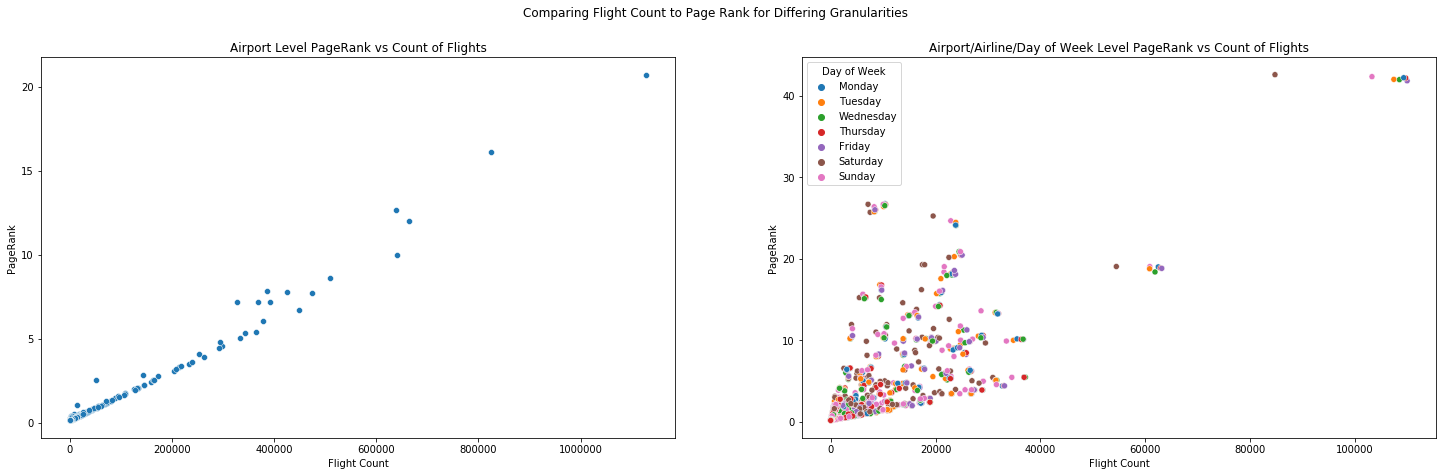

In [0]:
cn_pr_dat = spark.sql("SELECT * FROM group25.airports_dat_txt2 ap INNER JOIN group25.AIRPORTS_PR_TRAIN pr on pr.airport = ap.IATA INNER JOIN  (SELECT ORIGIN, count(*) as fl_count FROM group25.airlines_main WHERE year < 2018 GROUP BY 1) cn on cn.ORIGIN = pr.airport").toPandas()

fig, axes = plt.subplots(1, 2, figsize=(25, 7))
p = sns.scatterplot(x='fl_count', y='pageRank', ax=axes[0], data=cn_pr_dat)
x = axes[0].set(title='Airport Level PageRank vs Count of Flights', xlabel="Flight Count", ylabel="PageRank")

cn_pr_dat_h = spark.sql("""
  SELECT * 
  FROM group25.airports_dat_txt2 ap 
    INNER JOIN group25.AIRPORTS_AIRLINE_DOW_PR_TRAIN pr on pr.airport = ap.IATA 
    INNER JOIN  (SELECT ORIGIN, OP_CARRIER, DAY_OF_WEEK, count(*) as fl_count FROM group25.airlines_main WHERE year < 2018 GROUP BY 1, 2, 3) cn on cn.ORIGIN = pr.airport AND cn.DAY_OF_WEEK = pr.day_of_week AND cn.OP_CARRIER = pr.airline
  """).toPandas()

weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cn_pr_dat_h['weekday_name'] = cn_pr_dat_h.apply(lambda row: weekday_names[int(row.day_of_week)-1], axis=1)

p = sns.scatterplot(x='fl_count', y='pageRank', hue='weekday_name', hue_order=weekday_names, ax=axes[1], data=cn_pr_dat_h)
x = axes[1].legend(title = 'Day of Week')
x = axes[1].set(title='Airport/Airline/Day of Week Level PageRank vs Count of Flights', xlabel="Flight Count", ylabel="PageRank")
x = plt.suptitle('Comparing Flight Count to Page Rank for Differing Granularities')

### Inverting the Graph

While airports as vertexes and flights as edges is a very natural way to build a graph, there are potentially other ways we can do this. We wanted to try inverting the graph so that flights were vertexes and airports were edges. Essentially a flight going from Atlanta to Chicago (ATL->ORD) would be a vertex, and a flight going from Chicago to Los Angeles (ORD->LAX) would be another vertex. These vertices would be connected by an edge, because the destination of the first flight is the same as the origin of the next flight (ORD).

In [0]:
displayHTML("<img src = 'https://github.com/kasri-mids/ucb-w261-sp2021-team25/blob/main/images/pagerank_map.png?raw=true' style='display: block;margin-left: auto;margin-right: auto;width: 60%;'>")

As we did for the traditional airport centric graph, we experimented with several different levels of granularity. In the end, we included vertexes as flights on a given day at a given hour as the vertices, and airports on a given date at a given hour as the edges connecting them. Out of all the Page Rank versions we tried, this one seemed to give the best signal with respect to the variable we want to predict. The charts below compare these Page Ranks to the outcome variable.

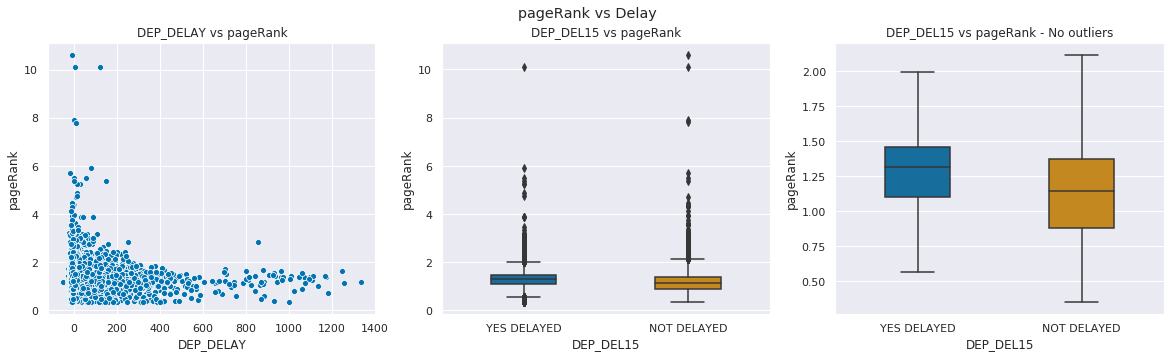

In [0]:
sampledDf = sqlContext.sql("""
WITH flights AS (SELECT ORIGIN, DEST, DEP_UTC_HOUR, DAY_OF_WEEK, DEP_DELAY, DEP_DEL15 FROM (SELECT ORIGIN, DEST, DEP_UTC_HOUR, DAY_OF_WEEK, COALESCE(DEP_DELAY, 0) AS DEP_DELAY, COALESCE(DEP_DEL15, 0) AS DEP_DEL15
                 FROM group25.airlines_utc_main WHERE year<2019) TABLESAMPLE(100000 ROWS))
SELECT DEP_DEL15, DEP_DELAY, pageRank FROM flights f left join group25.flights_dow_hour_pr_train pr 
  ON f.ORIGIN = pr.origin AND f.DEST = pr.dest AND pr.hour = f.DEP_UTC_HOUR AND f.DAY_OF_WEEK = pr.day_of_week
""").toPandas()

plot_cont_vs_delay('pageRank', df=sampledDf)

### Notes About Topic Sensitive PageRank

Topic-sensitive page rank computes page rank scores with a bias towards a specific topic. This is done by distributing the mass of dangling nodes to only vertexes identified within the topic. Another way to say this is that our random traveler would only be able to teleport to locations marked as being part of the topic.

There are several ways one might use topic-sensitive page rank for airline delays. One example would be to look at airlines as topics, so that when teleportation happened, the random traveller only went to a specific airport and airline. Similarly, some time dimension, like hour of day, could be considered a topic.

The GraphX libraries do not have an available implementation for topic-sensitive page rank. Instead, they have a personalized page rank, which is very similar except the topic can only be assigned to a single node. They have a parallel personalized page rank algorithm as well, but this computes several personalized (i.e. only one node in the topic) page ranks at once. It would have been relatively simple to apply the topic sensitivity to our Page Rank algorithm from homework 5. We would have just needed to broadcast the topic nodes, and then only apply the dangling mass to those nodes. Unfortunately, we ran out of time before we could make and test these modifications, so we will leave that as a future area for exploration.

## Airport Capacity

We also wanted to look at the volume of **inbound** and **outbound** flights at an airport when trying to predict flight delays. The reason we wanted to look at this was because we hypothesized periods of high traffic, or high delays at an airport may be correlated with delays.

### Inbound & Outbound Computation Process

- This is the flowchart of how we computed the sets of inbound and outbound features. 
- We first computed 1st iteration and raw statistics of inbound and outbound counts. 
- Then we computed the 2nd iteration of normalized inbound and outbound counts with the max_median.
- Please refer to below diagram.

In [0]:
displayHTML("<img src = https://github.com/kasri-mids/ucb-w261-sp2021-team25/blob/main/images/Inbound_Outbound_dataframes.svg?raw=true' style='height:740px;width:1000px'>  ")

### Normalization using Maximum of Medians

How to compute Maximum Median which is used for normalization? 
- Step1: we comute the houlry outbound/inbound counts for each airporlt/flight_date/hour.
- Step2: we compute the median inbound/outbound number for each airport at each hour (Say median inbound for all 10am-11am periods for airportA). 
- Step3: we find the maximum among all the medians for that particular airport.

In [0]:
displayHTML("<img src = 'https://github.com/kasri-mids/ucb-w261-sp2021-team25/blob/main/images/Calculate%20Max%20Median.svg?raw=true' style='height:740px;width:1000px'> '' ")

''

### Notebook for Inbound & Outbound Features: 
For code, please refer to: https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/439895120630397/command/439895120630399

### Hypothesis & background
- When we first approached the flight delay problem, we thought that inbound flights and outbound flights should be great features for predicting the flights delay or not. 
- The hypothesis behind that is busier airports could be more likely to have flights delay due to capacity constraints, tighter resources, and consequent congestion. All these reasons are likely to cause flights delay.

### 1st Iteration: 
- So we compute related inbounds and outbound features: 
  - For outbound features, we calculated:
    - outbound_counts /airport/flight date/departure local hour
    - diverted outbound_counts /airport/flight date/departure local hour
    - delay outbound_counts /airport/flight date/departure local hour
  - For inbound features, we calculated:
    - inbound_counts /airport/flight date/arr local hour
    - diverted inbound_counts /airport/flight date/arr local hour
    - delay inbound_counts /airport/flight date/arr local hour

#### Problem
However, when we plotted out the features against delay vs non-delay, we noticed that there wasn’t much difference for these inbound and outbound related features between delayed flights and non-delayed flights. Thus, these features were not quite useful at a first glance.

#### Analysis of Problem
Later, we further hypothesized that it could be the problem with normalization. The underlying reason is that each airport has different capacities. For instance, 100 outbound flights could be close to the maximum capacity of airportA but the same number could just be close to half of the capacity of airportB (which could have a much bigger capacity than AirportA). 

Another problem with raw statistics of inbound and outbound count is that airports might have increased maximum capacity due to renovation during the years between 2015-2020. So an absolute raw number would not take into account whether an airport is busy or not. An airport might have increased its capacity by say 20% after a renovation, such that 100 outbound/hour could be an amount that could cause congestion and delay flights before renovation, yet the same number might be an easy task for the same airport. And we didn’t take into account of this with the raw statistics.

So we went to search around for data that could tell us about each airport's capacity each year. However, we didn't find an ideal dataset.

#### Solution: Max Median
So finally, we decided to use max median inbound and max median outbound to normalize the raw inbound and outbound data.

The idea and reason behind that is we want to find a number that is somewhat approximate maximum capacity under the condition we don’t have any information of renovation. Here are some reasons:
Maximum hourly outbound/inbound number might be squeezed any statistics that happened before the renovation to a very small number. Thus we might get lots of incorrectly scaled number. 
Median hourly outbound/inbound might not approximate maximum capacity. 
Thus, to balance, we picked the maximum median, which is the maximum among the medians outbound/inbound for each hour for each airport.

#### How to calculate Maximum Median
How to compute Maximum Median which is used for normalization? 
- Step1: we comute the houlry outbound/inbound counts for each airporlt/flight_date/hour.
- Step2: we compute the median inbound/outbound number for each airport at each hour (Say median inbound for all 10am-11am periods for airportA). 
- Step3: we find the maximum among all the medians for that particular airport.

#### Code:
code for computing max_median_inbound & max_median_outbound, please refer to here: https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/439895120630397/command/439895120630403

#### Data Leakage: 
- For preventing data-leakage, we calculate the median for inbound counts and outbound bounds with data ONLY in 2015-2017, which is the same period as our training dataset. 
- The reason we use only training data (data in 2015-2017) to calculate median is because our model shouldn't know any data from the future. 
- We calculate the maximum median based on data from 2015-2017, and we use that to normalize all the data from 2015-2020. 

### 2nd Iteration: 
- So in the 2nd iteration, we normalized the sets of features in the 1st iteration. We calculate the normalized inbound/outbound related features by dividing the raw statistics by max_median for that corresponding airport
- For outbound features, we calculated:
  - normalized_outbound_counts = outbound_counts / max_median_outbound
  - normalized_diverted_outbound_counts = diverted_outbound_counts / max_median_outbound
  - normalized_delay_outbound_counts = delay_outbound_counts / max_median_outbound
- For inbound features, we calculated:
  - normalized_inbound_counts = inbound_counts / max_median_inbound
  - normalized_diverted inbound_counts = diverted_inbound_counts / max_median_inbound
  - normalized_delay inbound_counts = delay_inbound_counts / max_median_inbound
  

### Time Series of Inbound & Outbound Features
- To account for the time series-aspect of the airline data, we also calculate something we called as lag features. 
- These features ends like feature_name_xH (for example: NORMALIZED_OUTBOUND_COUNT_2H)
- For instance: for a flight that departs at 11am at AirportA that has NORMALIZED_OUTBOUND_COUNT_2H = 20, means that normalized outbound counts from 8am-9am at airportA (1 hour timeframe, 2 hours prior the departure time) .

- Below are some example lag features for inbound & outbound features. We done this for all 3 sets of inbound/outbound features: inbound/outbound, diverted inbound/outobund, delay inbound/outbound. 
    - OUTBOUND_COUNT_2H, OUTBOUND_COUNT_3H, OUTBOUND_COUNT_4H, OUTBOUND_COUNT_5H, OUTBOUND_COUNT_6H
    - NORMALIZED_OUTBOUND_COUNT_2H, NORMALIZED_OUTBOUND_COUNT_3H, NORMALIZED_OUTBOUND_COUNT_4H, NORMALIZED_OUTBOUND_COUNT_5H, NORMALIZED_OUTBOUND_COUNT_6H

###Join Inbound and Outbound Data with the Airline Data
- We join the inbound and outbound related features with the airlines_utc_main table with these columns:
  - For outbound: 
    - call_sign_dep (the airport code)
    - fl_date (flight date)
    - dep_local_hour (the local hour at the departure airport)
  - For inbound:
    - call_sign_arr
    - fl_date
    - arr_local_hour

## Diverted Inbound/Outbound Flights

We looked at the status of diverted inbound outbound flights when trying to generate features for our model. While the details are provided below, they did not find their way into the final model due to the sparsity of the diverted flight features.

###Hypothesis
- Diverted flights will increase the traffic of the airport unexpectedly, and thus might potentially cause other flights at that airport to delay.
- For each airport / day / hour, we calculated the number of diverted flights at that airport.
- When predicting flight delay, we take into account of the impact of diverted flight numbers at that airport.

###Normalization

- Use like the normalized Inbounds & Outbound features above, we normalized this feature with the max_median inbound/outbound counts of each airport.

### Rolling Windows

- Just like the discussion above at the normalized inbound/outbound, we also alculated Rolling Windowed Features for diverted flights (diverted inbound/outbound): eg 2_hr_prior, 3_hr_prior, …

##Delay Propagation

Prior delay flights at airport could be an indicating sign for further future delay for other flights. We take into account two different kinds of delay. One of them is those encountered by the airports, i.e., high traffic through the airport can cause congestion delays. We create new features made of 2-6 hour rolling window of these delays at each airport for each hour of the day. Another kind of delay is specific to the incoming aircraft, where we use the tail number of the aircraft scheduled for departure, to track its status. This is done 2 hours prior to departure. For example, let us suppose that an aircraft with tail number N953AT (a Delta Airlines aircraft) is flying out of Atlanta in 2 hours. At this point in time, we extract the current whereabouts of this particular aircraft and track it down to its previous departure. If we have any information regarding the departure of this aircraft, with respect to delay, we use it as long as the time at which this information is available is still 2 hours from departure. Additionally, we also use the amount of time it was delayed by as an additional feature. In the event that there is no information regarding the aircraft, we assume that there was no prior delay.

###Hypothesis
- Prior delay flights at airport could be an indicating sign for further future delay for other flights 
- For each airport / day / hour, we calculated the number of delayed flights at that airport
- When predict flight delay, take into account of that delayed flight numbers at that airport

###Normalization

- Use like the normalized Inbounds & Outbound features above, we normalized this feature with the max_median inbound/outbound counts of each airport.

### Rolling Windows

- Just like the discussion above at the normalized inbound/outbound, we also alculated Rolling Windowed Features for diverted flights (diverted inbound/outbound): eg 2_hr_prior, 3_hr_prior, …

## Data Quality

### Null Value Imputations

Our team largely used Spark SQL to join data together from various tables. Unfortunately, Spark’s MLLib will not work if the features will null values. Because of this, addressing nulls is extremely important for effective model results. 

Our ML pipeline approach involved generating features, and creating separate tables, then joining them back to the main airlines table via left joins. This allowed our team to work effectively in parallel to use a divide and conquer approach to generate interesting features. However, when joining the tables back together, a key issue we faced with these joins is null values.

We decided to impute the values differently, based on whether the feature was categorical or continuous.

**Continuous**

For all features, loop through &calculate the median for each grouping below:

  1. Call_Sign, Month, Hour
  2. Call_Sign, Month
  3. Call_Sign
  4. Overall Median

For each row, if the feature does not exist, use group 1. If group 1 does not exist, use group 2. If group 2 does not exist, use group 3. If group 3 does not exist, use group 4.

**Categorical**

The approach for this is much simpler. If the value is null, impute a 0 for null features.

A diagram highlighting our approach can be found below. The underlying code for this can be found in the Join notebook linked in the Companion notebook section.

In [0]:
displayHTML("<img src = 'https://github.com/kasri-mids/ucb-w261-sp2021-team25/blob/main/images/null_value_imputation.png?raw=true'>")

In addition to creating this imputation approach, we carefully examined each one of our attributes prior to imputation. In some scenarios, where the values were highly populated with null values, we decided to either impute 0's instead, or drop the data outright from the model. Furthermore, we performed EDA on the features with high nulls, to ensure that when imputing the data, the distribution of the data had no significant imputation outliers.

Out[43]:

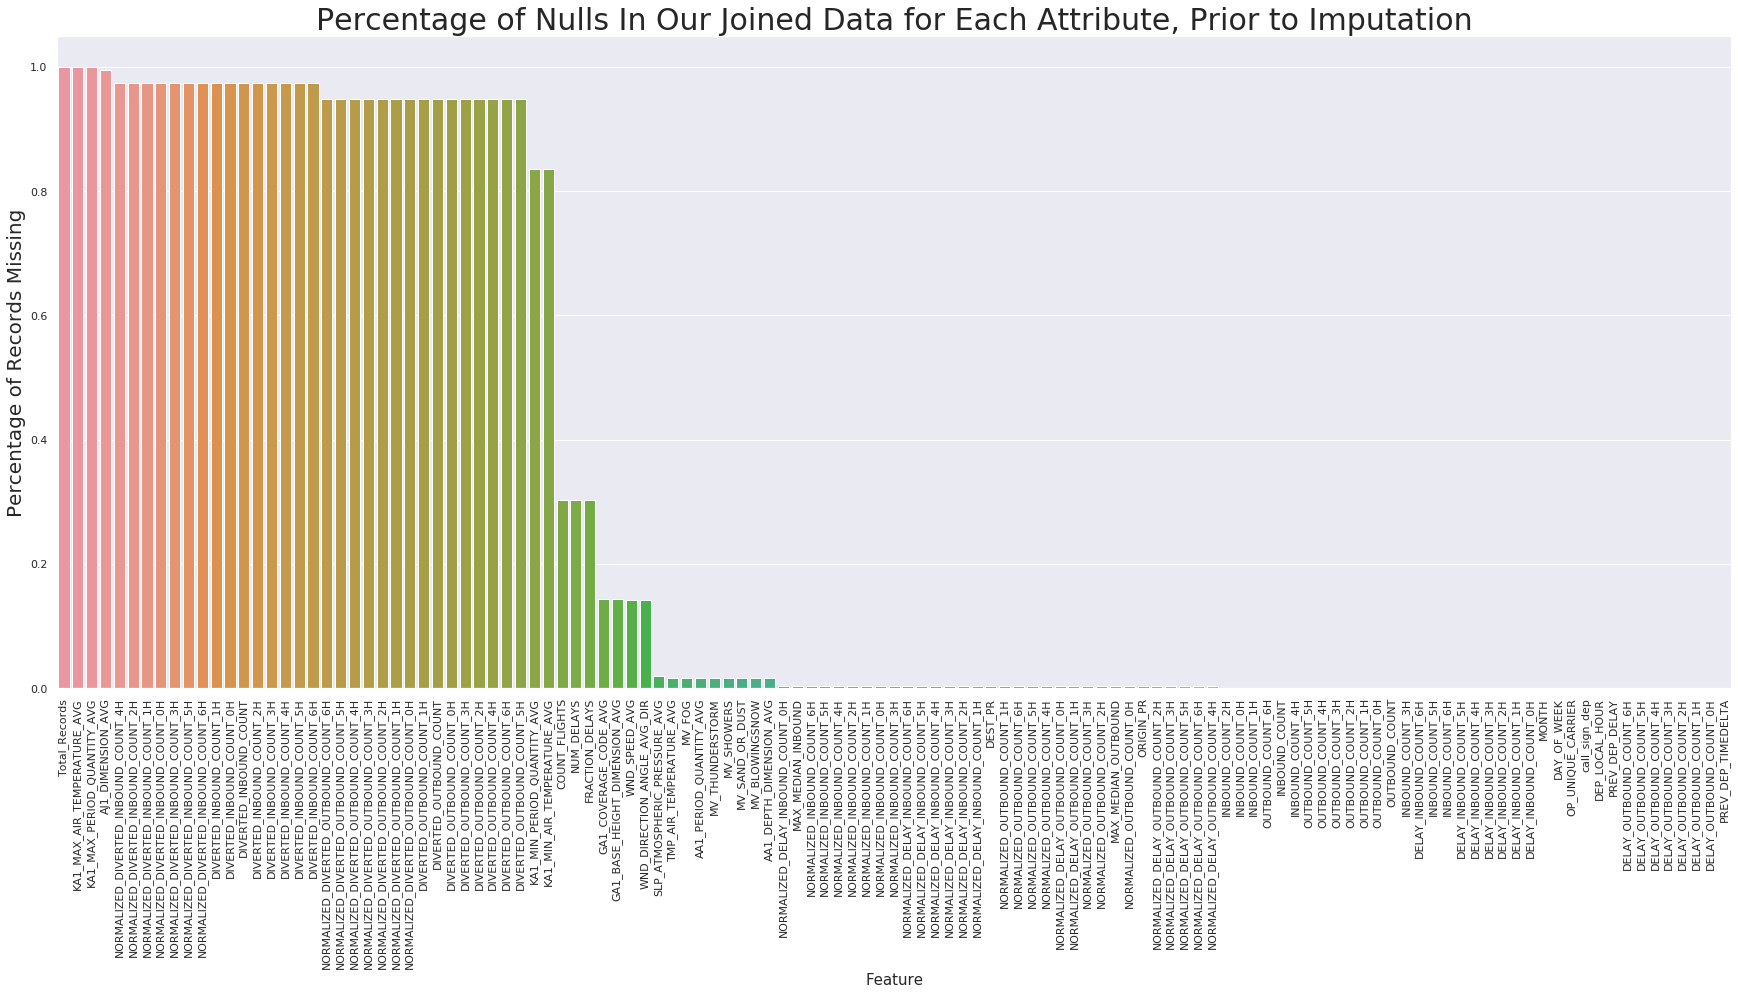

[(0.0, 1.05)]

In [0]:
nulls_for_each_column_pandas = sqlContext.sql("""select * from group25.nulls_for_each_column_prior_to_impute""").toPandas().transpose()

nulls = nulls_for_each_column_pandas.reset_index().sort_values(by=0, ascending = False)

nulls['Percentage of Records Missing'] = nulls[0] / (nulls[nulls['index'] == 'Total_Records'][0].values[0])

nulls.rename(columns = {'index':'Feature', 0: 'Num_of_Nulls'}, inplace = True)

plt.figure(figsize=(30,12))
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Percentage of Records Missing', fontsize = 20)
plt.title("Percentage of Nulls In Our Joined Data for Each Attribute, Prior to Imputation", fontsize = 30)
g = sns.barplot(x='Feature', y="Percentage of Records Missing", data=nulls)
g.set(ylim=(None, None))

### Data Leakage

#### Why Prevent Data Leakage
Data leakage is a critical part of ensuring our Machine Learning pipeline is as robust as possible. It is important to prevent data leakage when training the model because we want our model to predict well when it meets unseen data in a real world scenario. 

To ensure that our model doesn't predict delays/not-delay based on future information, we handle data with below approaches. 

#### Split Train/Test/Validation
The data that is given is from 2015-2019. A key concern of ours was how to prevent leakage, or val or test datasets leaking into our test dataset. To set up our data pipeline to prevent leakage, we set up train, test, and validation training sets:

- Train - 01/01/2015 - 12/31/2017
- Validation - 01/01/2018 - 12/31/2018
- Test - 01/01/2019 - 12/31/2019

#### Inbound & Outbound Statistics
- For the Inbound and Outbound related features, to prevent data leakage, so we connect the flights 
- To prevent data-leakage, when calculating the median for inbound counts and outbound bounds, we only use data in 2015-2017 to calculate the median.
- The reason we use only training data (data in 2015-2017) to calculate median is because our model shouldn't know any data from the future. 
- So we calculate median based on data from 2015-2017, and used that to normalized all the data from 2015-2020. 

#### Time Series Aspect of Inbound & Outbound Features
- To account for the time series-aspect of the airline data, we also calculate something we called as lag features. 
- These features ends like feature_name_xH (for example: NORMALIZED_OUTBOUND_COUNT_2H)
- For example NORMALIZED_OUTBOUND_COUNT_2H for a flight departs at 11am at AirportA, that means that normalized outbound counts from 8am-9am (1 hour interval, 2 hours prior the departure time) at airportA.
- Same theory applies for the inbound features. 

#### Weather Data
- To prevent data leakage, we only use weather data 2 hour prior the departure time of a particular flight
- For example, if a flight's departure date is 1/1/2016 10am, then we only use weather feature up until 1/1/2016 8am to predict whether its delay

#### Page Rank
- We only use data from 2015-2017 to compute pagerank features.

# S4 - Algorithm Exploration
Apply 2 to 3 algorithms to the training set, and discuss expectations, trade-offs, and results. These will serve as your baselines - do not spend too much time fine tuning these. You will want to use this process to select a final algorithm which you will spend your efforts on fine tuning.

We define the target variable 'DEP_DEL15' as a boolean and use classification algorithms to predict it. We start with the majority class as baseline (null majority class model). We then experimented with 
* Logistic Regression (with and without regularization)
* Decision Trees
* Random Forests
* Gradient Boosted and eXtreme Gradient Boosted Trees

We split the data into train, validation and test sets. We used data between 2015-2017 for train, 2018 for validation and 2019 for test. For all models discussed here, we use 5-fold cross validation on the train set. We perform a parameter grid search on the train set and evaluate the candidate models on the validation set. Since our dataset is imbalanced, i.e., the number of delays is much smaller than the number of undelayed fights, \\( \approx 4 \\) times smaller, we use the sampling techniques discussed below to address the imbalance. 

All sampling experiments are only conducted on the train data. We chose 1,000,000 train records for training on a wide class of ML algorithms.
* **No over/under sampling**: This is the baseline case with regards to sampling. No modifications are done to the train dataset.
* **Class-Weighted sampling**: Here, we do not modify the underlying train dataset but scale the losses to accommodate the imbalance.
* **Bootstrapping**: We duplicate the minority class so that we are left with similar proportions of delay/no-delay records.

Other kinds of oversampling such as SMOTE were considered but not pursued due to time constraints.

Finally, we scale the numerical variables using the robust scaler. This scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). This helps avoid the adverse effects of scaling under outliers influence.

#### Models

Model implementation was done in [this following notebook](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/606274953377686/command/4377823981614326).

For all the models discussed below, we ran the training exercise on randomly selected 1,000,000 records. We fine-tune the models on this smaller train set for faster model down selection. We compared various models using the \\( F_{0.5} \\) score. We take the viewpoint of the Airport/Airline that is looking to have more precision in the predictions. Any decisions made on the delay predictions are likely to have cascading consequences in the origin airport as well as the destination.

Summary:
* Our best model was found to be the eXtreme Gradient Boosted Model with class-weighted sampling.
* We need to address the data imbalance. Without data balancing, the model performance was unstable. Class-weighting is the easiest option available.
* We find that the prior delay information of an aircraft scheduled for departure can account for the most variance in the dataset. This was ascertained by observing the importance features of the Random Forest model.

Out[11]:

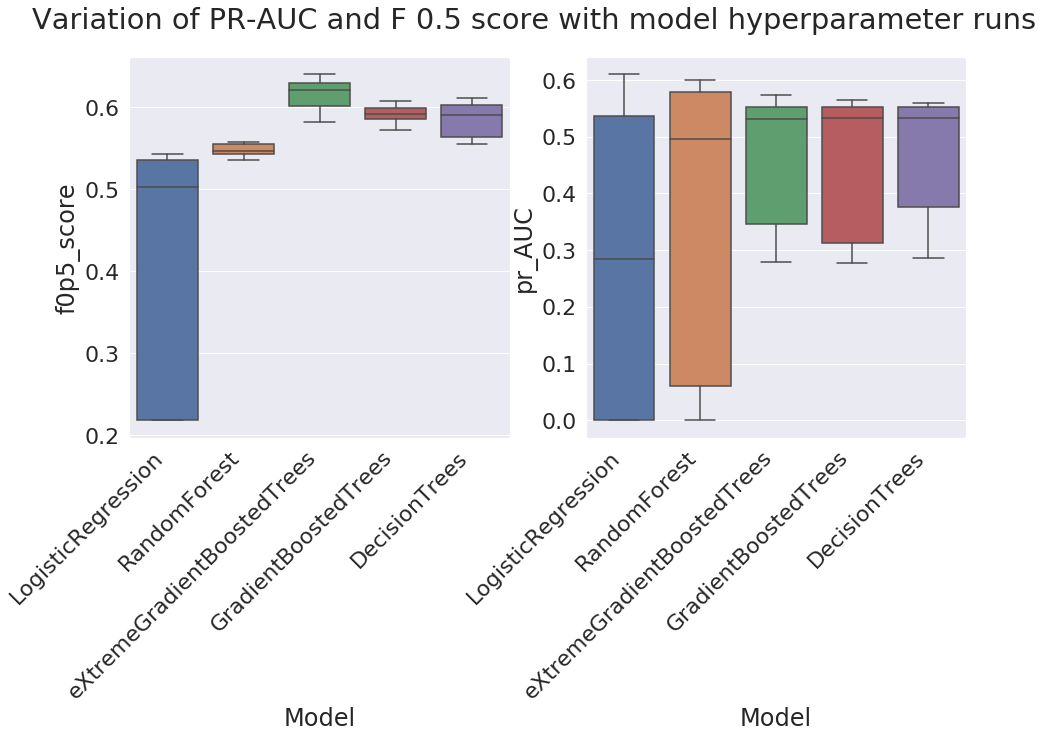

Text(0.5, 0.98, 'Variation of PR-AUC and F 0.5 score with model hyperparameter runs')

In [0]:
df_plot = sqlContext.sql(""" select * from group25.experiment_results_new where Prefix = 'Val' order by pr_AUC desc, f0p5_score desc""").cache().toPandas()
df_plot.loc[:,"f0p5_score"] = df_plot.f0p5_score.astype("float")
df_plot.loc[:,"pr_AUC"] = df_plot.pr_AUC.astype("float")

fig, axes = plt.subplots(1,2, figsize=(15,7))
sns.set(font_scale = 2)
sns.boxplot(data=df_plot, x="Model", y="f0p5_score", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')
sns.boxplot(data=df_plot, x="Model", y="pr_AUC", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
plt.suptitle('Variation of PR-AUC and F 0.5 score with model hyperparameter runs')

##### Null Majority Class

We treat the majority class prediction as the null baseline model. The validation dataset has 100,000 records with \\( \approx 17.9\% \\) of them belonging to the majority 'No Delay' class. This results in
* Baseline accuracy of 82.1%
* Baseline PR-AUC of 0.0
* Baseline \\( F_{0.5} \\) of 0.0

##### Logistic Regression

We ran hyperparameter experiments on the regularization parameters and the nature of the regularization ( \\( L_1 \\) vs 
\\( L_2 \\) vs blend). 

The regularization is defined through the loss function

$$ L(w | \alpha, \lambda) := \alpha \lambda || w ||_1 + (1 - \alpha)(\frac{\lambda}{2} || w ||_2^2), \; \alpha \in [0,1], \lambda \ge 0 $$

where \\( \alpha \\) and \\( \lambda \\) are regularization parameters and \\( w \\) are the weights.

Observations:
* We achieved a \\( F_{0.5} \\) score of 0.543 on the validation dataset (100,000 samples).
* To our surprise, the best Logistic Regression model, as evaluated on the validation set, turned out to be the one with no regularization and no oversampling/class-weighting.

Hyperparameters:
* Regularization Parameter: [0, 0.3]
* ElasticNet Parameter: [0.0, 0.5, 1.0] # 0: Ridge, 1: Lasso

In [0]:
display(sqlContext.sql(""" select * from group25.experiment_results_new where Model = 'LogisticRegression' and Prefix = 'Val' order by pr_AUC desc, f0p5_score desc""").head(30))

RecordTimeStamp,f2_score,f2_threshold,f0p5_score,f0p5_threshold,f1_score,f1_threshold,pr_AUC,roc_AUC,Model,HyperParameter,Sampling,Prefix,Notebook
2021-04-16T09:49:33.282+0000,0.572,0.469,0.502,0.696,0.483,0.594,0.61,0.612,LogisticRegression,"{""regParam"": ""0.5"", ""elasticNetParam"": ""0""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T09:37:33.973+0000,0.573,0.469,0.512,0.702,0.49,0.6,0.6,0.616,LogisticRegression,"{""regParam"": ""0.3"", ""elasticNetParam"": ""0""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T09:31:10.944+0000,0.581,0.42,0.535,0.76,0.504,0.653,0.56,0.636,LogisticRegression,"{""regParam"": ""0.0"", ""elasticNetParam"": ""1.0""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T09:16:27.360+0000,0.581,0.413,0.534,0.763,0.505,0.647,0.556,0.638,LogisticRegression,"{""regParam"": ""0.0"", ""elasticNetParam"": ""0""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T09:23:56.544+0000,0.581,0.414,0.535,0.759,0.505,0.648,0.555,0.638,LogisticRegression,"{""regParam"": ""0.0"", ""elasticNetParam"": ""0.5""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T09:51:11.806+0000,0.573,0.443,0.503,0.647,0.484,0.562,0.549,0.63,LogisticRegression,"{""regParam"": ""0.5"", ""elasticNetParam"": ""0""}",BootStrapping,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T09:39:24.032+0000,0.573,0.429,0.513,0.671,0.491,0.574,0.548,0.633,LogisticRegression,"{""regParam"": ""0.3"", ""elasticNetParam"": ""0""}",BootStrapping,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T09:19:15.804+0000,0.582,0.382,0.536,0.738,0.506,0.614,0.526,0.651,LogisticRegression,"{""regParam"": ""0.0"", ""elasticNetParam"": ""0""}",BootStrapping,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T09:33:45.545+0000,0.582,0.372,0.535,0.729,0.506,0.617,0.526,0.651,LogisticRegression,"{""regParam"": ""0.0"", ""elasticNetParam"": ""1.0""}",BootStrapping,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T09:26:36.900+0000,0.582,0.384,0.537,0.735,0.506,0.621,0.525,0.652,LogisticRegression,"{""regParam"": ""0.0"", ""elasticNetParam"": ""0.5""}",BootStrapping,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed


##### Decision Trees
In this work, we used gini impurity to split the nodes in the tree. We considered various depth of trees as the hyperparameter.

Observations:
* We achieved a \\( F_{0.5} \\) score of 0.611 on the validation dataset (100,000 samples).
* As expected the performance of the model improved as the depth of the tree increased. However, we stopped at a depth of 10 to avoid overfitting.

Hyperparameters:
* Max Depth of tree: [5, 10]

In [0]:
print('Precision-Recall AUC vs F-0.5 score at various hyperparameter runs')
display(sqlContext.sql(""" select * from group25.experiment_results_new where Model = 'DecisionTrees' and Prefix = 'Val' order by pr_AUC desc, f0p5_score desc""").head(30))

Precision-Recall AUC vs F-0.5 score at various hyperparameter runs

RecordTimeStamp,f2_score,f2_threshold,f0p5_score,f0p5_threshold,f1_score,f1_threshold,pr_AUC,roc_AUC,Model,HyperParameter,Sampling,Prefix,Notebook
2021-04-16T15:37:57.001+0000,0.576,0.52,0.555,0.898,0.489,0.652,0.559,0.642,DecisionTrees,"{""maxDepth"": ""5""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T15:55:44.032+0000,0.602,0.389,0.611,0.847,0.536,0.69,0.558,0.659,DecisionTrees,"{""maxDepth"": ""10""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T16:08:25.337+0000,0.601,0.378,0.601,0.813,0.536,0.652,0.538,0.669,DecisionTrees,"{""maxDepth"": ""10""}",BootStrapping,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T15:43:30.245+0000,0.572,0.394,0.559,0.884,0.496,0.62,0.527,0.655,DecisionTrees,"{""maxDepth"": ""5""}",BootStrapping,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T16:22:09.408+0000,0.594,0.125,0.603,0.581,0.525,0.321,0.326,0.793,DecisionTrees,"{""maxDepth"": ""10""}",NoOversampling,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T15:47:48.005+0000,0.528,0.111,0.579,0.638,0.489,0.29,0.286,0.791,DecisionTrees,"{""maxDepth"": ""5""}",NoOversampling,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed


##### Random Forest

A random forest is an ensemble method that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
We further control overfitting by parametrizing the depth of the tree and the number of trees in the ensemble.

Observations:
* We achieved a \\( F_{0.5} \\) score of 0.548 on the validation dataset (100,000 samples).
* The performance of the models saturated as the results from using 500 trees did not yield different results from an ensemble of 1000 trees.
* We also observed that not using some measure of oversampling or class-weighting resulted in degenerate models. This is seen in the plot below (green line) where the model predicts "No Delay" for all validation cases.
* Feature importances reveal that status of the previous journey of the scheduled airplane (TAIL_NUM) is the highest contributor to the variance in the delay data.

Hyperparameters:
* Max depth of tree: [3, 4, 5]
* Number of trees: [100, 500, 1000]

|idx|Feature Name|Importance|Category|
|-----|-------------------|-------------------|-------------------|
|456|PREV_DEP_DELAY_scaled_0|0.1|Delay Propagation|
|402|PREV_DEP_DELAY_BOOLclassVec_Delayed|0.1|Delay Propagation|
|401|PREV_DEP_DELAY_BOOLclassVec_Not_Delayed|0.09|Delay Propagation|
|430|NORMALIZED_DELAY_OUTBOUND_COUNT_2H_IMPUTE_scaled_0|0.07|Real-time Airport Delays|
|431|NORMALIZED_DELAY_OUTBOUND_COUNT_3H_IMPUTE_scaled_0|0.06|Real-time Airport Delays|
|435|NORMALIZED_DELAY_INBOUND_COUNT_2H_IMPUTE_scaled_0|0.05|Real-time Airport Delays|
|436|NORMALIZED_DELAY_INBOUND_COUNT_3H_IMPUTE_scaled_0|0.05|Real-time Airport Delays|
|432|NORMALIZED_DELAY_OUTBOUND_COUNT_4H_IMPUTE_scaled_0|0.05|Real-time Airport Delays|
|437|NORMALIZED_DELAY_INBOUND_COUNT_4H_IMPUTE_scaled_0|0.04|Real-time Airport Delays|
|433|NORMALIZED_DELAY_OUTBOUND_COUNT_5H_IMPUTE_scaled_0|0.04|Real-time Airport Delays|
|434|NORMALIZED_DELAY_OUTBOUND_COUNT_6H_IMPUTE_scaled_0|0.03|Real-time Airport Delays|
|414|NORMALIZED_OUTBOUND_COUNT_6H_IMPUTE_scaled_0|0.03|Airport Traffic/Capacity|
|438|NORMALIZED_DELAY_INBOUND_COUNT_5H_IMPUTE_scaled_0|0.03|Real-time Airport Delays|
|439|NORMALIZED_DELAY_INBOUND_COUNT_6H_IMPUTE_scaled_0|0.03|Real-time Airport Delays|
|411|NORMALIZED_OUTBOUND_COUNT_3H_IMPUTE_scaled_0|0.03|Airport Traffic/Capacity|
|412|NORMALIZED_OUTBOUND_COUNT_4H_IMPUTE_scaled_0|0.03|Airport Traffic/Capacity|
|413|NORMALIZED_OUTBOUND_COUNT_5H_IMPUTE_scaled_0|0.02|Airport Traffic/Capacity|
|455|PR_FLDH_scaled_0|0.02|Airport Relative Importance|
|440|PREV_DEP_TIMEDELTA_IMPUTE_scaled_0|0.01|Delay Propagation|
|419|NORMALIZED_INBOUND_COUNT_6H_IMPUTE_scaled_0|0.01|Airport Traffic/Capacity|
|410|NORMALIZED_OUTBOUND_COUNT_2H_IMPUTE_scaled_0|0.01|Airport Traffic/Capacity|
|418|NORMALIZED_INBOUND_COUNT_5H_IMPUTE_scaled_0|0.01|Airport Traffic/Capacity|
|417|NORMALIZED_INBOUND_COUNT_4H_IMPUTE_scaled_0|0.01|Airport Traffic/Capacity|
|363|DEP_LOCAL_HOURclassVec_17|0.01|Peak Hour|

In [0]:
display(sqlContext.sql(""" select * from group25.experiment_results_new where Model = 'RandomForest' and Prefix = 'Val' order by pr_AUC desc, f0p5_score desc""").head(30))

RecordTimeStamp,f2_score,f2_threshold,f0p5_score,f0p5_threshold,f1_score,f1_threshold,pr_AUC,roc_AUC,Model,HyperParameter,Sampling,Prefix,Notebook
2021-04-16T11:07:04.638+0000,0.568,0.477,0.536,0.605,0.481,0.555,0.6,0.611,RandomForest,"{""numTrees"": ""1000"", ""maxDepth"": ""3""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T10:12:09.552+0000,0.569,0.473,0.54,0.602,0.482,0.558,0.594,0.612,RandomForest,"{""numTrees"": ""500"", ""maxDepth"": ""3""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T09:56:54.272+0000,0.567,0.466,0.541,0.605,0.482,0.564,0.592,0.611,RandomForest,"{""numTrees"": ""100"", ""maxDepth"": ""3""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T11:38:13.910+0000,0.571,0.47,0.542,0.622,0.487,0.567,0.59,0.616,RandomForest,"{""numTrees"": ""1000"", ""maxDepth"": ""4""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T10:25:13.511+0000,0.57,0.472,0.543,0.626,0.487,0.555,0.586,0.616,RandomForest,"{""numTrees"": ""500"", ""maxDepth"": ""4""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T12:33:01.497+0000,0.573,0.462,0.546,0.64,0.494,0.569,0.581,0.621,RandomForest,"{""numTrees"": ""1000"", ""maxDepth"": ""5""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T10:43:53.437+0000,0.573,0.467,0.544,0.64,0.493,0.57,0.58,0.621,RandomForest,"{""numTrees"": ""500"", ""maxDepth"": ""5""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T10:00:32.079+0000,0.571,0.463,0.545,0.627,0.488,0.563,0.579,0.618,RandomForest,"{""numTrees"": ""100"", ""maxDepth"": ""4""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T10:04:59.497+0000,0.574,0.463,0.548,0.645,0.494,0.581,0.575,0.622,RandomForest,"{""numTrees"": ""100"", ""maxDepth"": ""5""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T13:01:41.527+0000,0.572,0.427,0.546,0.625,0.495,0.542,0.506,0.649,RandomForest,"{""numTrees"": ""1000"", ""maxDepth"": ""5""}",BootStrapping,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed


In [0]:
display(sqlContext.sql(""" select * from group25.experiment_results_new where Model = 'RandomForest' and Prefix = 'Val' order by pr_AUC desc, f0p5_score desc""").head(30))

RecordTimeStamp,f2_score,f2_threshold,f0p5_score,f0p5_threshold,f1_score,f1_threshold,pr_AUC,roc_AUC,Model,HyperParameter,Sampling,Prefix,Notebook
2021-04-16T11:07:04.638+0000,0.568,0.477,0.536,0.605,0.481,0.555,0.6,0.611,RandomForest,"{""numTrees"": ""1000"", ""maxDepth"": ""3""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T10:12:09.552+0000,0.569,0.473,0.54,0.602,0.482,0.558,0.594,0.612,RandomForest,"{""numTrees"": ""500"", ""maxDepth"": ""3""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T09:56:54.272+0000,0.567,0.466,0.541,0.605,0.482,0.564,0.592,0.611,RandomForest,"{""numTrees"": ""100"", ""maxDepth"": ""3""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T11:38:13.910+0000,0.571,0.47,0.542,0.622,0.487,0.567,0.59,0.616,RandomForest,"{""numTrees"": ""1000"", ""maxDepth"": ""4""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T10:25:13.511+0000,0.57,0.472,0.543,0.626,0.487,0.555,0.586,0.616,RandomForest,"{""numTrees"": ""500"", ""maxDepth"": ""4""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T12:33:01.497+0000,0.573,0.462,0.546,0.64,0.494,0.569,0.581,0.621,RandomForest,"{""numTrees"": ""1000"", ""maxDepth"": ""5""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T10:43:53.437+0000,0.573,0.467,0.544,0.64,0.493,0.57,0.58,0.621,RandomForest,"{""numTrees"": ""500"", ""maxDepth"": ""5""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T10:00:32.079+0000,0.571,0.463,0.545,0.627,0.488,0.563,0.579,0.618,RandomForest,"{""numTrees"": ""100"", ""maxDepth"": ""4""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T10:04:59.497+0000,0.574,0.463,0.548,0.645,0.494,0.581,0.575,0.622,RandomForest,"{""numTrees"": ""100"", ""maxDepth"": ""5""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T13:01:41.527+0000,0.572,0.427,0.546,0.625,0.495,0.542,0.506,0.649,RandomForest,"{""numTrees"": ""1000"", ""maxDepth"": ""5""}",BootStrapping,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed


##### Gradient Boosted Trees

Gradient boosted trees build on the idea of decision trees by adding in additional layers of trees that predict the error of the previous tree. The trees are then combined to improve prediction performance. They are called gradient boosted trees because gradient descent to minimize the loss function.

Observations:
* We found the gradient boosted tree family to have better performance than other models investigated. here again, we observed that the sampling methodology had a significant impact in model performance.
* We achieved a \\( F_{0.5} \\) score of 0.607 on the validation dataset (100,000 samples).


Hyperparameters:
* Max depth of tree: [3, 4, 5]
* Number of trees: [3, 7, 11]

In [0]:
display(sqlContext.sql(""" select * from group25.experiment_results_new where Model = 'GradientBoostedTrees' and Prefix = 'Val' order by pr_AUC desc, f0p5_score desc""").head(30))

RecordTimeStamp,f2_score,f2_threshold,f0p5_score,f0p5_threshold,f1_score,f1_threshold,pr_AUC,roc_AUC,Model,HyperParameter,Sampling,Prefix,Notebook
2021-04-16T07:10:40.722+0000,0.603,0.402,0.607,0.82,0.531,0.68,0.564,0.653,GradientBoostedTrees,"{""maxIter"": ""11"", ""maxDepth"": ""5""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T06:55:25.343+0000,0.6,0.414,0.601,0.807,0.525,0.704,0.562,0.649,GradientBoostedTrees,"{""maxIter"": ""7"", ""maxDepth"": ""5""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T06:41:16.086+0000,0.586,0.402,0.597,0.784,0.517,0.695,0.562,0.644,GradientBoostedTrees,"{""maxIter"": ""11"", ""maxDepth"": ""3""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T06:32:08.689+0000,0.584,0.401,0.587,0.775,0.509,0.687,0.559,0.643,GradientBoostedTrees,"{""maxIter"": ""7"", ""maxDepth"": ""3""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T06:45:58.133+0000,0.595,0.416,0.595,0.812,0.522,0.683,0.554,0.646,GradientBoostedTrees,"{""maxIter"": ""3"", ""maxDepth"": ""5""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T07:44:00.141+0000,0.597,0.347,0.591,0.793,0.521,0.564,0.548,0.652,GradientBoostedTrees,"{""maxIter"": ""3"", ""maxDepth"": ""5""}",BootStrapping,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T07:56:13.518+0000,0.6,0.346,0.598,0.817,0.527,0.658,0.544,0.66,GradientBoostedTrees,"{""maxIter"": ""7"", ""maxDepth"": ""5""}",BootStrapping,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T08:13:54.245+0000,0.603,0.366,0.602,0.811,0.531,0.636,0.539,0.666,GradientBoostedTrees,"{""maxIter"": ""11"", ""maxDepth"": ""5""}",BootStrapping,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T07:36:48.748+0000,0.585,0.413,0.591,0.773,0.517,0.656,0.535,0.655,GradientBoostedTrees,"{""maxIter"": ""11"", ""maxDepth"": ""3""}",BootStrapping,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T06:25:57.058+0000,0.58,0.316,0.58,0.759,0.499,0.665,0.532,0.648,GradientBoostedTrees,"{""maxIter"": ""3"", ""maxDepth"": ""3""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed


##### eXtreme Gradient Boosted Trees

xgBoost is an optimized version of gradient boosted trees, which generally outperforms other implementations in terms of speed and results. In particular, it uses a more regularized model formalization to control over-fitting, which gives it better performance. Because of its speed, it is among the most popular models used by winning ML competition teams. 

Observations:
* We found the extreme gradient boosting model to be the most robust of all models tested so far. The graphs shown below indicate that the choice of sampling has a bigger impact than that of the hyperparameters chosen.
* We achieved a \\( F_{0.5} \\) score of 0.621 on the validation dataset (100,000 samples).

Hyperparameters:
* Max depth of tree: [4, 8, 12]
* Learning Rate: [0.001, 0.01, 0.1]

In [0]:
display(sqlContext.sql(""" select * from group25.experiment_results_new where Model = 'eXtremeGradientBoostedTrees' and Prefix = 'Val' order by pr_AUC desc, f0p5_score desc""").head(30))

RecordTimeStamp,f2_score,f2_threshold,f0p5_score,f0p5_threshold,f1_score,f1_threshold,pr_AUC,roc_AUC,Model,HyperParameter,Sampling,Prefix,Notebook
2021-04-16T16:57:29.432+0000,0.616,0.413,0.621,0.805,0.551,0.685,0.573,0.666,eXtremeGradientBoostedTrees,"{""eta"": ""0.1"", ""maxDepth"": ""4""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T18:06:01.793+0000,0.612,0.432,0.621,0.712,0.551,0.592,0.568,0.664,eXtremeGradientBoostedTrees,"{""eta"": ""0.01"", ""maxDepth"": ""8""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T17:45:16.385+0000,0.625,0.403,0.64,0.843,0.562,0.657,0.564,0.679,eXtremeGradientBoostedTrees,"{""eta"": ""0.1"", ""maxDepth"": ""8""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T18:30:06.706+0000,0.605,0.492,0.61,0.532,0.538,0.515,0.564,0.659,eXtremeGradientBoostedTrees,"{""eta"": ""0.001"", ""maxDepth"": ""8""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T17:10:42.650+0000,0.597,0.453,0.589,0.697,0.527,0.571,0.554,0.654,eXtremeGradientBoostedTrees,"{""eta"": ""0.01"", ""maxDepth"": ""4""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T19:35:07.964+0000,0.617,0.442,0.628,0.687,0.554,0.581,0.55,0.678,eXtremeGradientBoostedTrees,"{""eta"": ""0.01"", ""maxDepth"": ""12""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T20:11:50.488+0000,0.608,0.489,0.616,0.533,0.541,0.515,0.549,0.669,eXtremeGradientBoostedTrees,"{""eta"": ""0.001"", ""maxDepth"": ""12""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T20:32:05.722+0000,0.616,0.381,0.623,0.809,0.552,0.636,0.548,0.678,eXtremeGradientBoostedTrees,"{""eta"": ""0.1"", ""maxDepth"": ""4""}",BootStrapping,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T17:25:34.618+0000,0.585,0.492,0.582,0.529,0.502,0.51,0.536,0.645,eXtremeGradientBoostedTrees,"{""eta"": ""0.001"", ""maxDepth"": ""4""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed
2021-04-16T18:59:11.745+0000,0.62,0.365,0.638,0.819,0.562,0.587,0.531,0.698,eXtremeGradientBoostedTrees,"{""eta"": ""0.1"", ""maxDepth"": ""12""}",ClassWeighted,Val,/Users/kasri@berkeley.edu/final_project_team25_model_trimmed


# S5 - Algorithm Implementation

Create your own toy example that matches the dataset provided and use this toy example to explain the math behind the algorithm that you will perform. Apply your algorithm to the training dataset and evaluate your results on the test set.

## Toy Problem for Logistic Regression

In order to illustrate the inner workings of one of the algorithms we are working with, we will be implementing a toy example of logistic regression using gradient descent. Unlike linear regression, which uses a linear combination of terms, logistic regression applies the sigmoid function to the typical regression equation. In other words,

$$f(x) = \frac{1}{1 + e^{-\theta^{T}x}} $$

Similarly, unlike linear regression, which uses squared loss, logistic regression uses log-loss cost function. The Logloss function is below:


$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} -y_{i} \times log(h_{\theta}(x_{i})) + (1 - y_{i}) \times log(1-h_{\theta}(x_{i}))$$


Below is the code to implement logistic regression for a very small subset of data for KORD (Chicago), for  the first quarter of 2015. I will use 3 columns - dep_del15 (dependent variable), with 2 sample scaled features.

In [0]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

## Query a small subset of data for the toy problem. Ensure that the variables will be scaled from 0-1 or else the log loss function will not work properly
df =  sqlContext.sql("""
select dep_del15, 
    fraction_delays_impute as sample_feature_scaled1, 
    outbound_count_impute/109 as sample_feature_scaled2
   from group25.data_train_main
    where call_sign_dep = "KORD"
    limit 1000
""")


## Convert the dataframe to RDD
test_rdd = df.rdd.map(list).cache()

In [0]:
test_rdd2 = test_rdd.map(lambda x: (x[0], x[1:])).cache()

# initialize set of coefficients
initialize_weights = [0.01, 0.01, 0.01]

def LogLoss(dataRDD,W):
    """
    Compute log loss error.
    
    Args:
        dataRDD - records are tuples of (features_array, y)
        W       - (array) model coefficients with bias at index 0
    """
    #Augment the matrix
    augmentedData = dataRDD.map(lambda x: (np.append([1.0],x[1:]),x[0]))
    
    #Take the dot product, apply the sigmoid function, then run through the cost function.
    log_loss = augmentedData \
        .map(lambda x: (np.dot(x[0],W),x[1])) \
        .map(lambda x: (1 / (1 + np.exp(-x[0])),x[1])) \
        .map(lambda x: (-x[1]*np.log(x[0]) - (1-x[1])*np.log(1-x[0]))) \
          .mean()


    return log_loss

Now that we have computed the loss function, let's proceed with iterative updates using gradient descent. The gradient can be calculated as 

$$ C' = x(s(z) - y) $$

where \\( C' \\) is the derivative of wrt weights, \\( x \\) is the feature vector, \\( s(z) \\) is the predicted value, and \\( y \\) is the class label.

In [0]:
def GDUpdate(dataRDD, W, learningRate = 0.1):
    """
    Perform one Log Loss gradient descent step/update.
    Args:
        dataRDD - records are tuples of (features_array, y)
        W       - (array) model coefficients with bias at index 0
    Returns:
        new_model - (array) updated coefficients, bias at index 0
    """
    #Augment the matrix
    augmentedData = dataRDD.map(lambda x: (np.append([1.0],x[1:]),x[0])) \
    
    # Step 1: Take the dot product of the weights and the features, and the label
        #(dotproduct, augmented  features vector, label)
    # Step 2. Apply the sigmoid function, with the 
        # sigmoid, augmented features vector, label.
    # Step 3: Calculate the gradient.
    gradient = augmentedData.map(lambda x: (np.dot(x[0],W),x[0],x[1])) \
                  .map(lambda x: (1 / (1 + np.exp(-x[0])),x[1],x[2])) \
                  .map(lambda x: np.dot((x[0] - x[2]), x[1])).mean()

    # Multiply the learning rate against the gradient. Return new weights.
    update = W - np.multiply(gradient, initialize_weights)
    
    return update
    
GDUpdate(test_rdd2,  [0.01, 0.01, 0.01])

Out[111]: array([0.00705358, 0.00944123, 0.00951878])

Next, let's run through 5 iterations.

In [0]:
# Take a look at a few Gradient Descent steps

nSteps = 5
model = initialize_weights
print(f"BASELINE:  Loss = {LogLoss(test_rdd2,model)}")
for idx in range(nSteps):
    print("----------")
    print(f"STEP: {idx+1}")
    model = GDUpdate(test_rdd2, model)
    loss = LogLoss(test_rdd2, model)
    print(f"Loss: {loss}")
    print(f"Model: {[round(w,3) for w in model]}")

BASELINE: Loss = 0.6971060095499909
----------
STEP: 1
Loss: 0.6961847622991331
Model: [0.007, 0.009, 0.01]
----------
STEP: 2
Loss: 0.695268596977507
Model: [0.004, 0.009, 0.009]
----------
STEP: 3
Loss: 0.6943574853406284
Model: [0.001, 0.008, 0.009]
----------
STEP: 4
Loss: 0.6934513992747053
Model: [-0.002, 0.008, 0.008]
----------
STEP: 5
Loss: 0.6925503107965786
Model: [-0.005, 0.007, 0.008]

## Optimal model

We chose the eXtreme Gradient Boosted model algorithm to train on a larger train data set and test on the hold-out test set. The model was trained on 1,000,000 train records and tested on 5,000,000 hold-out samples.

The threshold is chosen to be 0.632 based on the performance of the model on validation data. This results in the following confusion matrix.

|Predicted/Actual|Predicted-NoDelay|Predicted-Delay|
|---------|---|---|
|Actual-NoDelay|3,953,562|112,351|
|Actual-Delay|594,202|340,514|

|Predicted/Actual|Predicted-NoDelay|Predicted-Delay|
|---------|---|---|
|Actual-NoDelay|0.79|0.022|
|Actual-Delay|0.12|0.068|

**This model results in a Precision of 0.752, a recall of 0.362, and a \\( F_{0.5} \\) score of 0.619.**

## Summary

We found that delay propagation was the most important feature in predicting delays. We found our models to have a good balance of the bias-variance trade-off since we achieved similar results on the unseen test data. Furthermore, we tested on 5X the training sample size.

# S6 - Conclusions

Report results and learnings for both the ML as well as the scalability

## Challenges & Learnings

- **Downstream Impact:** There were many challenges that we had in trying to build our ML pipeline. For instance, as mentioned earlier in this notebook, time was a critical feature in building our ML pipeline. One issue we faced is we used DEP_TIME (the actual departure time) and CRS_DEP_TIME (the scheduled departure time) but made no distinction between the 2 early on. We only discovered this issue after we had started working on engineered features downstream, which caused some issues. For future practitioners in this space, it is important to note that ML pipelines can grow to be extremely complex. Ensuring that the right code is implemented, and the team has the proper understanding upstream can save a lot of pain and time downstream.
- **Spark issues:** In the closing days of the project, we encountered several issues with the Spark cluster constantly restarting, which impacted our team's ability to iterate on hyperparameter tuning.
- **Java/Python Interop:** Most of our code was in python, and this generally worked fine. However, we ran into problems dealing with the xGBoost library, as it is not a native python library and returned some wrapped Java structures that we weren't quite sure how to deal with. Perhaps we would have been better off using scala by default.
- **A comment on scalability:** We leveraged some aspects of Spark, such as using UDFs and python specific functions to process time - ironically, using this approach took a lot of time compared to other Spark native functions. If the scale of the data was 10x'd, it is not certain that using this approach would be as efficient at scale..
- **Volume of Data:** (weather) [Jeff]
- **Development Processes** As we worked, we very gradually refined our development processes, but we would have benefitted from a more clearly defined process up front. Patterns for code organization, working outside of notebooks, using reliable storage for experiment results, and abstracting generic tasks are areas we could have spent more time on, in retrospect.


## Areas for Improvement

- Topic Specific Page Rank: Topic-sensitive page rank computes page rank scores with a bias towards a specific topic. This is done by distributing the mass of dangling nodes to only vertexes idetified within the topic. Another way to say this is that our random traveller would only be able to teleport to locations marked as being part of the topic.
- Streaming updates to Page Rank [5]
- Look for additional features / data sources
- Experiment with additional time lags
- Time Series Analysis
- Real time updates of features like Page Rank
- Capacity of airports from 2015-2019 to normalize the inbound & outbound statistics
- Interview practitioners or stakeholders to get different perspectives
- Ensemble Methods - we might apply different models for different data conditions.

# S7 - Application of Course Concepts

 Pick 3-5 key course concepts and discuss how your work on this assignment illustrates an understanding of these concepts.
 
- **Normalization:** When examining our inbound/outbound flights, we scaled each feature to ensure that the number of flights was normalized by the overall traffic at the airport. Additionally, when setting up our data to be used for training, we scaled all of our numerical data from 0 to 1.

- **Assumptions for Different Algorithms:**

- **Page Rank:** Our team attempted several iterations of page rank and used it as a feature in building out our model. We used the understanding of PageRank we built in class to consider various ways of building graphs, and what Page Rank means with respect to their structure. We did investigate and discuss the use of Topic Sensitive PageRank, which was also covered in class, although we did not end up having time to implement it. 

- **Regularization:** We applied regularization when training models such as Logistic Regression.

- **One Hot Encoding / vector embeddings / feature selection:** For our categorical variables, we applied one hot encoding when utilizing Spark's MLLib

# Appendix

## List of Features

Below is a table of features we generated.

|Column name|Description|Categorical/Continuous|
|-------------------|-------------------|-------------------|
|DEP_DEL15|Our dependent variable. Indicates whether or not the flight was delayed by 15 minutes|Categorical|
|NORMALIZED_OUTBOUND_COUNT_2H|Count of outbound flights 2 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_OUTBOUND_COUNT_3H|Count of outbound flights 3 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_OUTBOUND_COUNT_4H|Count of outbound flights 4 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_OUTBOUND_COUNT_5H|Count of outbound flights 5 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_OUTBOUND_COUNT_6H|Count of outbound flights 6 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_INBOUND_COUNT_2H|Count of inbound flights 2 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_INBOUND_COUNT_3H|Count of inbound flights 3 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_INBOUND_COUNT_4H|Count of inbound flights 4 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_INBOUND_COUNT_5H|Count of inbound flights 5 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_INBOUND_COUNT_6H|Count of inbound flights 6 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DIVERTED_OUTBOUND_COUNT_2H|Count of diverted outbound flights 2 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DIVERTED_OUTBOUND_COUNT_3H|Count of diverted outbound flights 3 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DIVERTED_OUTBOUND_COUNT_4H|Count of diverted outbound flights 4 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DIVERTED_OUTBOUND_COUNT_5H|Count of diverted outbound flights 5 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DIVERTED_OUTBOUND_COUNT_6H|Count of diverted outbound flights 6 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DIVERTED_INBOUND_COUNT_2H|Count of diverted inbound flights 2 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DIVERTED_INBOUND_COUNT_3H|Count of diverted inbound flights 3 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DIVERTED_INBOUND_COUNT_4H|Count of diverted inbound flights 4 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DIVERTED_INBOUND_COUNT_5H|Count of diverted inbound flights 5 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DIVERTED_INBOUND_COUNT_6H|Count of diverted inbound flights 6 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DELAY_OUTBOUND_COUNT_2H|Count of delayed outbound flights 2 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DELAY_OUTBOUND_COUNT_3H|Count of delayed outbound flights 3 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DELAY_OUTBOUND_COUNT_4H|Count of delayed outbound flights 4 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DELAY_OUTBOUND_COUNT_5H|Count of delayed outbound flights 5 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DELAY_OUTBOUND_COUNT_6H|Count of delayed outbound flights 6 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DELAY_INBOUND_COUNT_2H|Count of delayed inbound flights 2 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DELAY_INBOUND_COUNT_3H|Count of delayed inbound flights 3 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DELAY_INBOUND_COUNT_4H|Count of delayed inbound flights 4 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DELAY_INBOUND_COUNT_5H|Count of delayed inbound flights 5 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|NORMALIZED_DELAY_INBOUND_COUNT_6H|Count of delayed inbound flights 6 hours prior to the actual flight at that particular hour, normalized by the volume of traffic at an airport|Continuous|
|PREV_DEP_TIMEDELTA|How long was the previous flight (by tail num) delayed by, in minutes|Categorical|
|MONTH|Month|Categorical|
|DAY_OF_WEEK|Day of the week|Categorical|
|OP_UNIQUE_CARRIER|Unique Carrier, e.g. airline|Categorical|
|call_sign_dep|Call Sign, or airport of the departing airport|Categorical|
|DEP_LOCAL_HOUR|Departure hour|Categorical|
|WND_DIRECTION_ANGLE_AVG_DIR|Categorical var of the wind direction (NW, SW, SE, NE) 2 hours prior from WND, binned on airport, date and hour|Categorical|
|MV_THUNDERSTORM|Boolean of whether or not there was a Thunderstorm from the Weather Events 2 hours prior from MV1 or MV2, binned on airport, date and hour|Categorical|
|MV_SHOWERS|Boolean of whether or not there were showers from the Weather Events 2 hours prior from MV1 or MV2, binned on airport, date and hour|Categorical|
|MV_SAND_OR_DUST|Boolean of whether or not there was sand or dust from the Weather Events 2 hours prior from MV1 or MV2, binned on airport, date and hour|Categorical|
|MV_BLOWINGSNOW|Boolean of whether or not there was blowing snow from the Weather Events 2 hours prior from MV1 or MV2, binned on airport, date and hour|Categorical|
|MV_FOG|Boolean of whether or not there was fog from the Weather Events 2 hours prior from MV1 or MV2, binned on airport, date and hour|Categorical|
|AA1_DEPTH_DIMENSION_AVG|Average of the AA1 episodic rain depth dimension from the NOAA dataset 2 hours prior, binned on airport, date, and hourly |Continouous|
|AA1_PERIOD_QUANTITY_AVG|Average of the AA1 period quantity rain depth dimension from the NOAA dataset 2 hours prior, binned on airport, date, and hourly |Continouous|
|GA1_COVERAGE_CODE_AVG|Average of the GA1 cloud coverage from the NOAA dataset 2 hours prior, binned on airport, date, and hourly |Continouous|
|GA1_BASE_HEIGHT_DIMENSION_AVG|Average of the GA1 cloud height from the NOAA dataset 2 hours prior, binned on airport, date, and hourly |Continouous|
|WND_SPEED_AVG|Average of wind speed from the NOAA dataset 2 hours prior, binned on airport, date, and hourly |Continouous|
|TMP_AIR_TEMPERATURE_AVG|Average of temperature from the NOAA dataset 2 hours prior, binned on airport, date, and hourly |Continouous|
|SLP_ATMOSPHERIC_PRESSURE_AVG|Average of SLP atmospheric pressure from the NOAA dataset 2 hours prior, binned on airport, date, and hourly |Continouous|
|ORIGIN_PR|Page Rank of the origin Airport|Continouous|
|DEST_PR|Page Rank of the destination Airport|Continouous|
|PR_AA_ORIGIN|Page Rank of the origin Airport and Airline|Continouous|
|PR_AA_DEST|Page Rank of the destination Airport and Airline|Continouous|
|PR_AAD_ORIGIN|Page Rank of the origin Airport and Airline on a given Day|Continouous|
|PR_AAD_DEST|Page Rank of the destination Airport and Airline on a given Day|Continouous|
|PR_AADD_ORIGIN|Page Rank of the origin Airport and Airline on a given Day, only Delayed Flights as Edges|Continouous|
|PR_AADD_DEST|Page Rank of the destination Airport and Airline on a given Day, only Delayed Flights as Edges|Continouous|
|PR_FL|Page Rank of the Flight in the Flight-Vertex Graph|Continouous|
|PR_FLD|Page Rank of the Flight in the Flight-Vertex Graph on a Given Day|Continouous|
|PR_FLDH|Page Rank of the Flight in the Flight-Vertex Graph on a Given Day of Week|Continouous|

## Some reference publications & websites:

1) 2017. A Review on Flight Delay Prediction. Alice Sternberg, Jorge de Abreu Soares, Diego Carvalho, Eduardo S. Ogasawara

2) 2019. A Data Mining Approach to Flight Arrival Delay Prediction for American Airlines. Navoneel Chakrabarty

3) 2019. Development of a predictive model for on-time arrival flight of airliner by discovering correlation between flight and weather data. Noriko Etani.

4) https://stat-or.unc.edu/wp-content/uploads/sites/182/2018/09/Paper3_MSOM_2012_AirlineFlightDelays.pdf

5) J. Riedy, "Updating PageRank for Streaming Graphs," 2016 IEEE International Parallel and Distributed Processing Symposium Workshops (IPDPSW), Chicago, IL, USA, 2016, pp. 877-884, doi: 10.1109/IPDPSW.2016.22.

6) Gopalakrishnan, Karthik & Balakrishnan, Hamsa. (2017). A comparative analysis of models for predicting delays in air traffic networks. 

7) 2016. XGBoost: A Scalable Tree Boosting System. Chen, Tianqi and Guestrin, Carlos.